## Goldsmith University of London 

### Department of Computing
### MSc Data Science and Artificial Intelligence
### 2024-25
#### Name – Ahaan Tagare 
##### Student ID -33865799
##### Supervisor - Dr V L Raju Chinthalapati




#### Enhancing Credit Card Fraud Detection: A Comparative Framework Integrating Machine Learning, Deep Learning, and Probabilistic Distribution Analysis.

##### Introduction 

This comprehensive analysis presents an end-to-end fraud detection system leveraging machine learning and deep learning techniques to identify fraudulent credit card transactions. The project begins with meticulous data preprocessing, including handling missing values through iterative imputation for numerical features and mode imputation for categorical variables, capping outliers in transaction amounts, and strategic feature engineering. The "Amount" feature is weighted to amplify its importance, while SMOTE (Synthetic Minority Oversampling Technique) addresses severe class imbalance—only 7.2% of transactions are fraudulent. The processed data undergoes rigorous modeling with traditional ML algorithms (Logistic Regression, Decision Trees, Random Forest, XGBoost) and deep learning architectures (CNNs, LSTMs, GRUs), all optimized via hyperparameter tuning.

Key innovations include probabilistic neural networks with Monte Carlo dropout for uncertainty quantification and SHAP values for model interpretability. Performance is evaluated across accuracy, precision, recall, F1-score, and ROC AUC metrics, with XGBoost emerging as the optimal model. The system culminates in actionable insights through visualizations—confusion matrices, ROC curves, and feature importance plots—and a detailed sample-wise analysis demonstrating real-world efficacy in distinguishing fraudulent transactions from legitimate ones. This pipeline not only achieves high predictive accuracy but also provides transparency and robustness essential for financial security applications.



##### Full ML/DL Python Environment Configuration

This code suppresses TensorFlow logs and general warnings to keep the output clean and uncluttered. It then imports essential libraries for machine learning, statistical analysis, data handling, visualization, web app deployment, and environment simulation — including TensorFlow, TensorFlow Probability, NumPy, Pandas, Matplotlib, Seaborn, Plotly, SHAP, Streamlit, Gym, and Missingno. Altogether, it prepares a tidy, well-equipped environment for developing, analyzing, visualizing, and sharing AI or data science projects efficiently.

In [3]:
import os
import warnings
# Suppress TensorFlow logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import tensorflow_probability as tfp
tf.get_logger().setLevel('ERROR') 
tf.autograph.set_verbosity(0)  
# Suppress deprecation and general warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')
# Other imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import shap
import streamlit as st
import gym
import missingno as msno

The below code sets up an extensive machine learning and deep learning environment by importing key libraries and modules. It includes TensorFlow/Keras tools for building various neural network architectures like Sequential models, Dense layers, CNNs, GRUs, and LSTMs. Keras Tuner is added for automating hyperparameter tuning with HyperModel and RandomSearch. TensorFlow Probability is loaded for advanced probabilistic modeling. Scikit-learn modules cover model evaluation (accuracy, precision, recall, F1, ROC AUC), preprocessing (imputation, scaling, one-hot encoding), and dimensionality reduction (PCA). It brings in classic machine learning models such as logistic regression, decision trees, KNN, random forests, Naive Bayes, and ensemble methods. Tools for model selection like GridSearchCV and Stratified K-Fold are included to optimize and validate models. SMOTE from imbalanced-learn helps handle imbalanced datasets through synthetic oversampling. XGBoost is added for powerful gradient boosting classification, while utilities like SciPy sparse matrices, haversine distance calculation, Counter for counting elements, and scikit-learn pipelines support advanced data processing and workflow automation. Altogether, this setup ensures a robust, flexible environment for end-to-end machine learning and deep learning projects.

In [4]:
# TensorFlow / Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU, LSTM
# Keras Tuner
from keras_tuner import HyperModel, RandomSearch
# TensorFlow Probability
tfd = tfp.distributions
# Scikit-learn - Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Scikit-learn - Imputation & Scaling
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
# Scikit-learn - Model Selection
from sklearn.model_selection import GridSearchCV, train_test_split
# Scikit-learn - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Dimensionality Reduction
from sklearn.decomposition import PCA, IncrementalPCA
# Imbalanced-learn
from imblearn.over_sampling import SMOTE
# XGBoost
from xgboost import XGBClassifier
# Utilities
from scipy.sparse import csr_matrix
from haversine import haversine
from collections import Counter
from sklearn.pipeline import Pipeline

##### Methodology

This flowchart visualizes the end-to-end methodology for credit card fraud detection. It begins with loading and exploring the dataset to understand its structure and patterns. Next, it handles missing values using iterative imputation for numerical features and mode imputation for categorical ones. Outliers in the transaction amount are detected and capped to limit their impact. After dropping unnecessary columns, the data is split, encoded, scaled, and balanced using SMOTE. A weight is applied to the amount feature, and test data is preprocessed similarly. Various models — including Logistic Regression, Decision Tree, Random Forest, XGBoost, Neural Network, CNN, LSTM, and GRU — are trained and fine-tuned. Finally, models are evaluated using multiple metrics, results are visualized, and uncertainty is quantified to ensure robust fraud detection.

In [13]:
# Define the nodes (steps) and their labels (as provided)
nodes = [
    "Start",
    "Load CreditCardData.csv\nExplore shape, info, statistics\nVisualize correlations/distributions",
    "Impute missing values:\nNumerical (Amount) with IterativeImputer\nCategorical with mode",
    "Detect outliers in Amount\n(5th-95th percentiles) and cap them",
    "Drop Fraud, Transaction ID, Date\nSplit data\nEncode categorical, scale numerical\nApply SMOTE",
    "Weight Amount feature (2.0)\nPreprocess test data",
    "Train Logistic Regression, Decision Tree,\nRandom Forest, XGBoost, Neural Network,\nCNN, LSTM, GRU\nTune hyperparameters",
    "Evaluate models (Accuracy, Precision,\nRecall, F1-Score, ROC AUC)\nVisualize results\nQuantify uncertainty",
    "End"
]

# Define node positions (x, y) 
node_x = [0.5] * len(nodes)  
node_y = [1.0, 0.85, 0.72, 0.59, 0.46, 0.33, 0.20, 0.07, 0.0]  

# Define edges (connections between nodes)
edges = [
    (0, 1),  
    (1, 2),  
    (2, 3),  
    (3, 4),  
    (4, 5),  
    (5, 6),  
    (6, 7)   
    
]

# Create node traces (for markers, hidden behind annotations)
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=nodes,
    mode='markers',  
    marker=dict(
        size=0,  # Hide markers; annotations define boxes
        color=['#FFD700' if i in [0, 8] else '#ADD8E6' for i in range(len(nodes))],
    ),
    hoverinfo='text'
)

# Create edge traces (lines for arrows)
edge_x = []
edge_y = []
for start, end in edges:
    edge_x += [node_x[start], node_x[end], None]
    edge_y += [node_y[start] - 0.07, node_y[end] + 0.07, None]  # Adjusted for node spacing

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=2, color='black', shape='spline'),
    mode='lines',
    hoverinfo='none'
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Fraud Detection Methodology Flowchart',
                    title_x=0.5,
                    showlegend=False,
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    margin=dict(l=50, r=50, b=50, t=100),
                    paper_bgcolor='white',
                    plot_bgcolor='white',
                    width=800,
                    height=1200  
                ))

# Add annotations for nodes 
for i, node in enumerate(nodes):
    fig.add_annotation(
        x=node_x[i],
        y=node_y[i],
        text=node.replace('\n', '<br>'),  
        showarrow=False,
        font=dict(size=10),  
        bgcolor='#FFD700' if i in [0, 8] else '#ADD8E6',  
        bordercolor='black',
        borderwidth=2,
        width=180, 
        height=80 if i not in [0, 8] else 50,  
        align='center',
        borderpad=10
    )

# Add downward-pointing arrowheads
for start, end in edges:
    fig.add_annotation(
        x=node_x[end],  
        y=node_y[end] + 0.07,  
        ax=node_x[start],  
        ay=node_y[start] - 0.07,  
        xref='x',
        yref='y',
        axref='x',
        ayref='y',
        showarrow=True,
        arrowhead=2,  
        arrowsize=1.5,
        arrowwidth=2,
        arrowcolor='black',
        standoff=10  
    )

# Display the plot
fig.show()

# Save as HTML for interactive viewing
fig.write_html('fraud_detection_flowchart.html')


#### Data analysis


This code first defines the location of the CreditCardData.csv file and then loads its contents into a DataFrame called credit_data using pandas. It checks the basic structure by printing the total number of rows and columns. After that, it prints the dataset’s metadata, such as column names, data types, and non-null values. Together, these steps help the user understand the size and structure of the credit card dataset before further analysis.


In [3]:
file_path = "CreditCardData.csv"

In [4]:
credit_data = pd.read_csv(file_path)
print(credit_data.shape)

(100000, 16)


In [5]:
print("Dataset Info:")
print(credit_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank   

This code calculates the correlation matrix for the numeric columns in the **`credit_data`** DataFrame. It then visualizes these correlations as a heatmap with annotated values and a color scheme to highlight positive and negative relationships. After displaying the heatmap, it prints a title and shows the first five rows of the dataset to give a quick look at the actual data. This helps the user understand both the relationships between variables and how the data looks in its raw form.


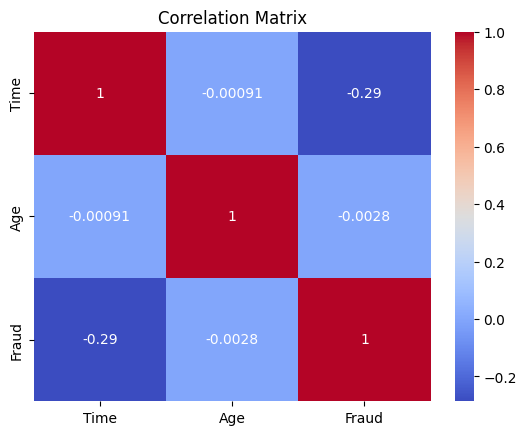

In [6]:
corr = credit_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [7]:
print("\nFirst 5 rows of the dataset:")
print(credit_data.head())


First 5 rows of the dataset:
  Transaction ID       Date Day of Week  Time Type of Card Entry Mode Amount  \
0      #3577 209  14-Oct-20   Wednesday    19         Visa        Tap     £5   
1      #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   £288   
2      #2694 780  14-Oct-20   Wednesday    14         Visa        Tap     £5   
3      #2640 960  13-Oct-20     Tuesday    14         Visa        Tap    £28   
4      #2771 031  13-Oct-20     Tuesday    23         Visa        CVC    £91   

  Type of Transaction Merchant Group Country of Transaction Shipping Address  \
0                 POS  Entertainment         United Kingdom   United Kingdom   
1                 POS       Services                    USA              USA   
2                 POS     Restaurant                  India            India   
3                 POS  Entertainment         United Kingdom            India   
4              Online    Electronics                    USA              USA   

  Countr

In [8]:
# Summary statistics
print("\nSummary statistics:")
print(credit_data.describe())


Summary statistics:
                Time            Age          Fraud
count  100000.000000  100000.000000  100000.000000
mean       14.562870      44.993770       0.071950
std         5.308195       9.948494       0.258406
min         0.000000      15.000000       0.000000
25%        10.000000      38.200000       0.000000
50%        15.000000      44.900000       0.000000
75%        19.000000      51.700000       0.000000
max        24.000000      86.100000       1.000000


This code creates boxplots for the **‘Time’** and **‘Age’** columns to visualize their distributions and detect outliers. It then cleans the **‘Amount’** column by removing any currency symbols and commas, converts it to numeric, and counts any invalid entries that couldn’t be converted. After cleaning, it prints how many **‘Amount’** values are now missing (NaN). Finally, it shows summary statistics for **‘Amount’**, **‘Time’**, **‘Age’**, and **‘Fraud’** to help understand their ranges and averages.


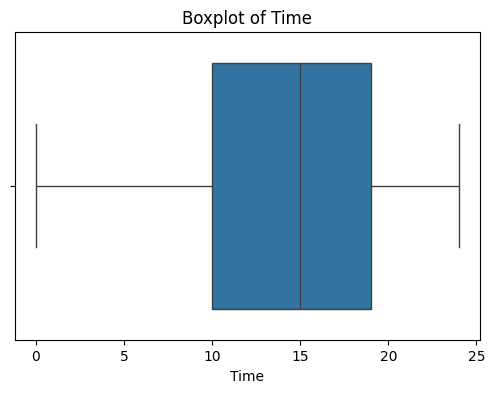

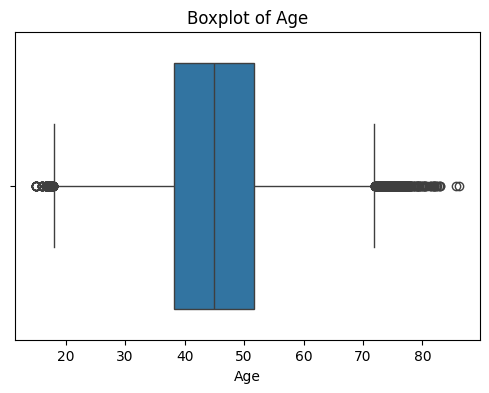

In [9]:
numeric_cols = ['Time', 'Age']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=credit_data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [10]:
credit_data['Amount'] = credit_data['Amount'].astype(str).replace('[£,]', '', regex=True)
credit_data['Amount'] = pd.to_numeric(credit_data['Amount'], errors='coerce')
print("Number of invalid 'Amount' values after cleaning:", credit_data['Amount'].isna().sum())
print("\nSummary Statistics:")
print(credit_data[['Amount', 'Time', 'Age', 'Fraud']].describe())

Number of invalid 'Amount' values after cleaning: 6

Summary Statistics:
             Amount           Time            Age          Fraud
count  99994.000000  100000.000000  100000.000000  100000.000000
mean     112.578515      14.562870      44.993770       0.071950
std      123.433893       5.308195       9.948494       0.258406
min        5.000000       0.000000      15.000000       0.000000
25%       17.000000      10.000000      38.200000       0.000000
50%       30.000000      15.000000      44.900000       0.000000
75%      208.000000      19.000000      51.700000       0.000000
max      400.000000      24.000000      86.100000       1.000000


This code counts how many transactions are labeled as fraud and non-fraud in the **‘Fraud’** column and prints those counts. It then plots these counts as a bar chart to visually compare the number of fraudulent versus non-fraudulent transactions. The chart helps show if the dataset is imbalanced, which is important for fraud detection analysis.


In [11]:
fraud_counts = credit_data['Fraud'].value_counts()
print(fraud_counts)

Fraud
0    92805
1     7195
Name: count, dtype: int64


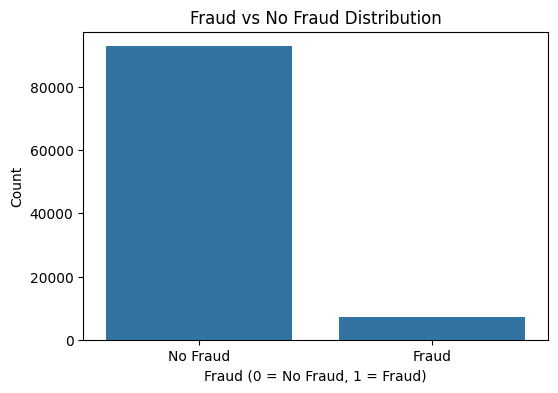

In [12]:
# Plotting the fraud vs non-fraud distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Fraud vs No Fraud Distribution')
plt.xlabel('Fraud (0 = No Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'])
plt.show()

#### Missing Values

This code checks for missing values in the **`credit_data`** DataFrame and prints the columns that have any. It then creates a new DataFrame showing which columns have missing data and how many values are missing. Using this, it plots a horizontal bar chart to visualize the number of missing values in each column. This helps identify where data cleaning or imputation may be needed.


In [13]:
missing_values = credit_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
Amount               6
Merchant Group      10
Shipping Address     5
Gender               4
dtype: int64


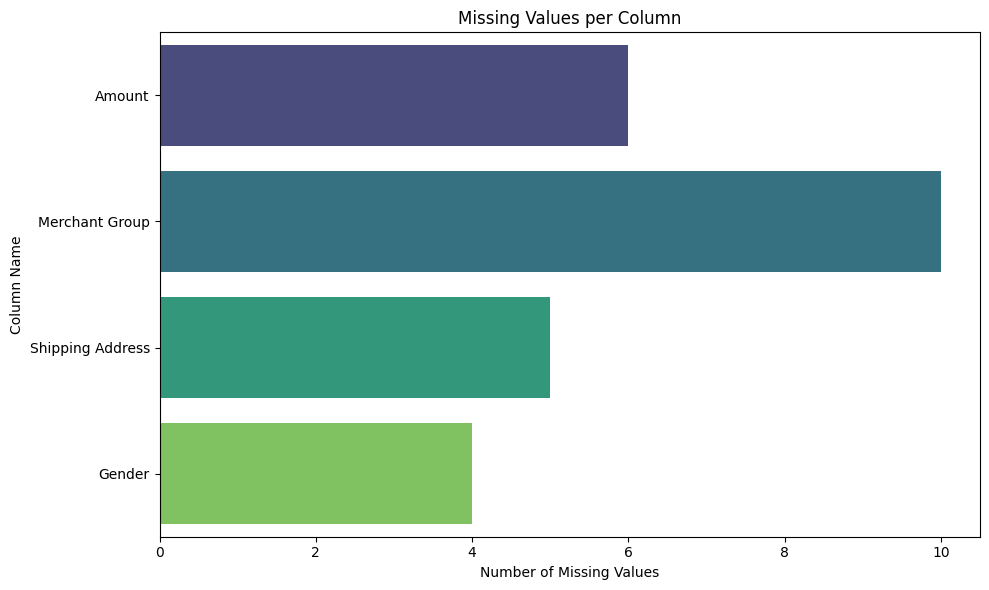

In [14]:
# Calculate missing values
missing_values = credit_data.isnull().sum()
missing_columns = missing_values[missing_values > 0]
# Create a DataFrame for plotting
missing_df = pd.DataFrame({
    'Column': missing_columns.index,
    'MissingCount': missing_columns.values
})
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_df, x='MissingCount', y='Column', palette='viridis', hue='Column', legend=False)
plt.title('Missing Values per Column')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column Name')
plt.tight_layout()
plt.show()

This code uses an **Iterative Imputer** with a Random Forest Regressor to fill in missing values in the **‘Amount’** column by predicting them based on other data patterns. It prints the number of missing values afterward to confirm that the numerical imputation worked. For the categorical columns **‘Gender’**, **‘Merchant Group’**, and **‘Shipping Address’**, it checks if the missing values are less than 5% of the data and fills them with the most frequent value (mode) if they are. If a column has more than 5% missing, it fills those missing entries with the label **‘Missing’** instead. Finally, it prints the updated missing value count to confirm all imputations were handled correctly.


$$ Xmiss=ˆf(Xobs)$with$ˆf=Random Forest Regressor X_{\text{miss}} = \hat{f}(X_{\text{obs}})$ with $\hat{f} = \text{Random Forest Regressor} $$ 


In [15]:
iter_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)
numerical_columns = ['Amount'] 
credit_data[numerical_columns] = iter_imputer.fit_transform(credit_data[numerical_columns])
print("Missing values after imputation:")
print(credit_data.isnull().sum())

Missing values after imputation:
Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     0
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64


In [16]:
categorical_columns = ['Gender', 'Merchant Group', 'Shipping Address']
for col in categorical_columns:
    if credit_data[col].isnull().sum() < (0.05 * len(credit_data)): 
        credit_data[col] = credit_data[col].fillna(credit_data[col].mode()[0])
    else:  
        credit_data[col] = credit_data[col].fillna('Missing')
print("Missing values after categorical imputation:")
print(credit_data.isnull().sum())

Missing values after categorical imputation:
Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64


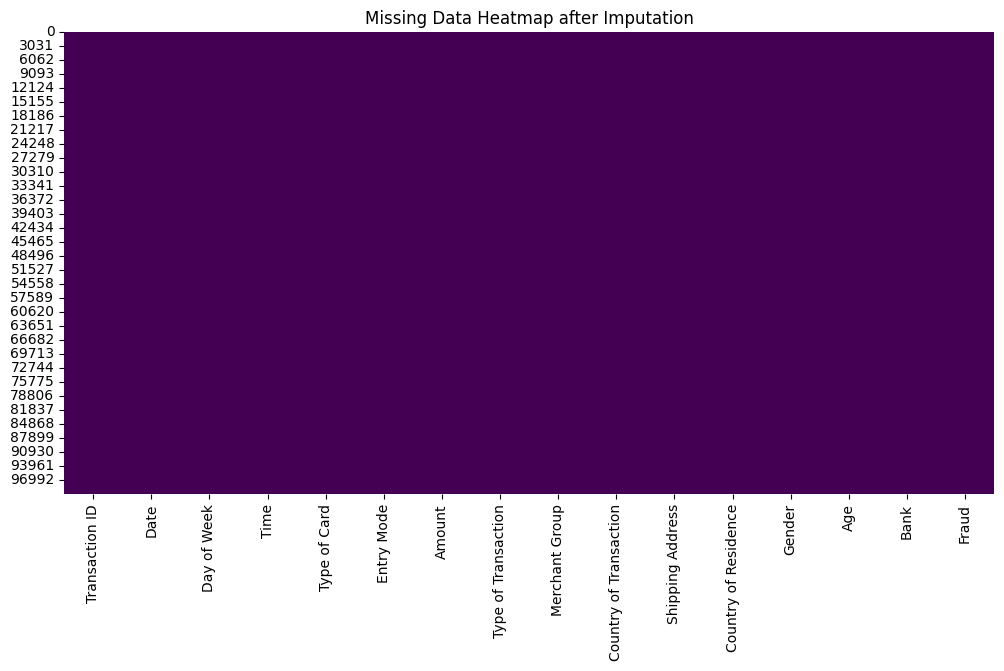

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(credit_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap after Imputation")
plt.show()

##### Handling Outliers

This code defines two functions: one to **detect outliers** in a column based on the 5th and 95th percentiles, and another to **cap** those outliers so that extreme values are replaced with the nearest limit. It first counts how many **‘Amount’** values fall outside this percentile range and prints that number. Then, it caps these outliers within the 5th–95th percentile and verifies that no values remain outside this range by printing the count again. It visualizes the **‘Amount’** distribution before capping using a boxplot and histogram to show the effect of outliers. Finally, it repeats the plots after capping to demonstrate how the distribution becomes less skewed and more robust for analysis.


$$
L = P_{\text{lower}} = \text{percentile at lower \%} 
\quad \text{and} \quad 
U = P_{\text{upper}} = \text{percentile at upper \%}
$$


In [18]:
def detect_outliers_percentile(data, column, lower=5, upper=95):
    """Identify outliers using percentiles."""
    lower_bound = data[column].quantile(lower / 100)
    upper_bound = data[column].quantile(upper / 100)
    return (data[column] < lower_bound) | (data[column] > upper_bound)

def cap_outliers_percentile(data, column, lower=5, upper=95):
    """Cap values at specified percentiles."""
    lower_bound = data[column].quantile(lower / 100)
    upper_bound = data[column].quantile(upper / 100)
    data[column] = np.clip(data[column], lower_bound, upper_bound)
    return data

In [19]:
# Detect outliers before capping (5th-95th percentile range)
outliers_before = detect_outliers_percentile(credit_data, 'Amount', 5, 95).sum()
print(f"Outliers before capping: {outliers_before}")

# Cap outliers
credit_data = cap_outliers_percentile(credit_data, 'Amount', 5, 95)

# Verify no outliers remain in the 5th-95th range
outliers_after = detect_outliers_percentile(credit_data, 'Amount', 5, 95).sum()
print(f"Outliers after capping: {outliers_after}")  

Outliers before capping: 8886
Outliers after capping: 0


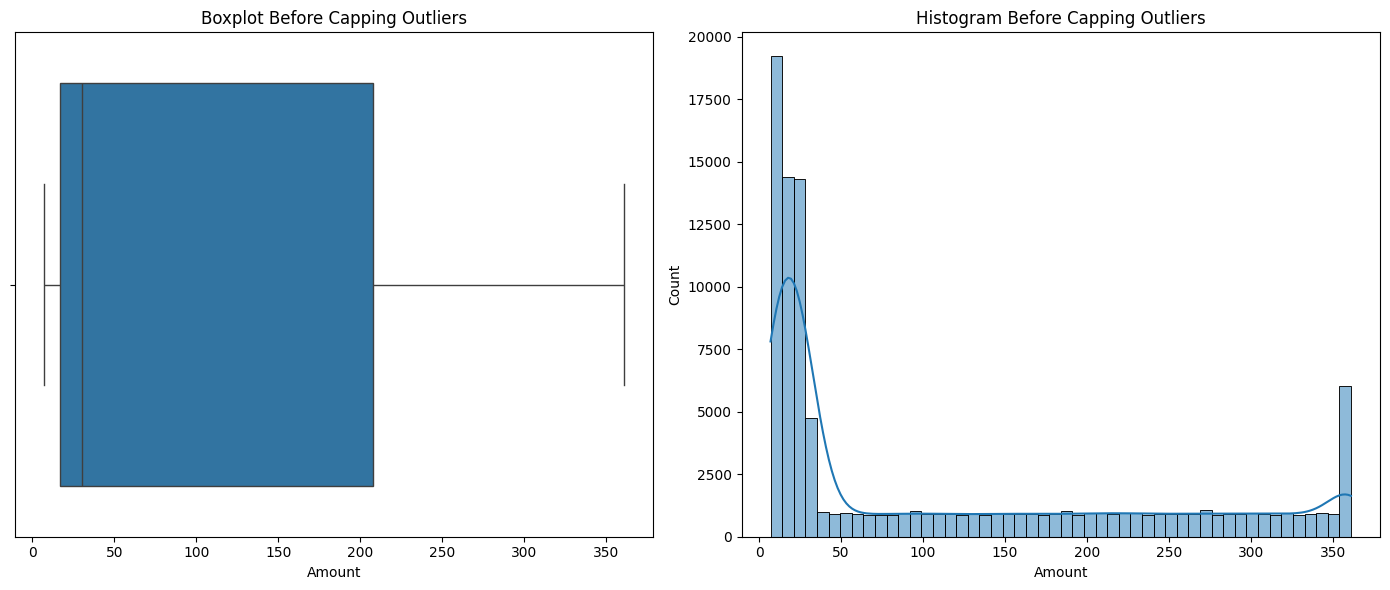

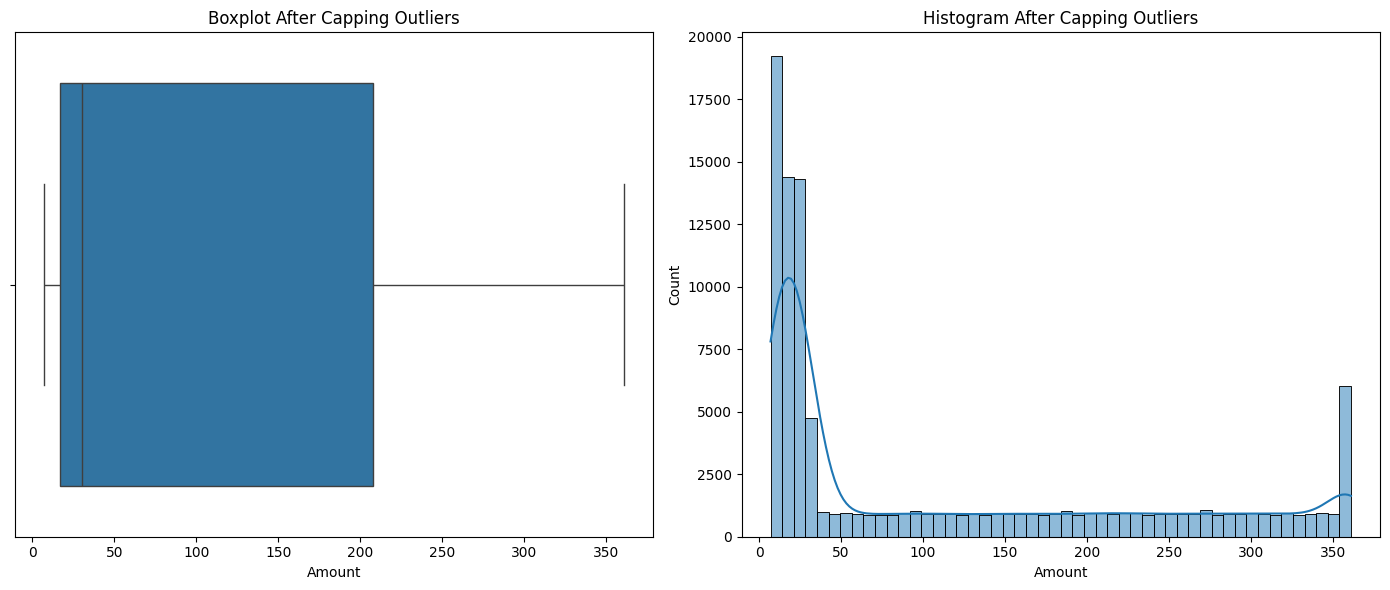

In [20]:
# Plot before capping
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=credit_data['Amount'])
plt.title('Boxplot Before Capping Outliers')
plt.subplot(1, 2, 2)
sns.histplot(credit_data['Amount'], bins=50, kde=True)
plt.title('Histogram Before Capping Outliers')
plt.tight_layout()
plt.show()
credit_data_capped = cap_outliers_percentile(credit_data.copy(), 'Amount', 5, 95)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=credit_data_capped['Amount'])
plt.title('Boxplot After Capping Outliers')
plt.subplot(1, 2, 2)
sns.histplot(credit_data_capped['Amount'], bins=50, kde=True)
plt.title('Histogram After Capping Outliers')
plt.tight_layout()
plt.show()


#### Feature Engineering (Smote) and train test split

$$
x_{\text{new}} = x_{i} + \delta \cdot (x_{\text{nn}} - x_{i}), \quad \text{with} \quad \delta \sim U(0, 1)
$$

This means a new synthetic sample is generated by taking an original minority instance $x_{i}$ and moving towards one of its nearest neighbors $x_{\text{nn}}$ by a random proportion $\delta$. The value $\delta$ is drawn from a uniform distribution between 0 and 1, so the new sample lies somewhere on the line segment connecting the two real samples.


This code first separates the dataset into features (**X**) and the target (**y**, which is the **‘Fraud’** column). It splits the data into training and test sets, making sure the fraud classes remain balanced using **stratified sampling**. Then, it identifies which features are categorical and which are numerical, and creates a **ColumnTransformer** to one-hot encode categorical columns and scale numerical ones. After preprocessing the training features, it applies **SMOTE**, an oversampling technique, to balance the classes by creating synthetic fraud cases. Finally, it prints the new class distribution to show that the fraud and non-fraud samples are now balanced in the training set.


In [21]:
X = credit_data.drop(['Fraud', 'Transaction ID', 'Date'], axis=1)
y = credit_data['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(exclude=['object']).columns

In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])
X_train_processed = preprocessor.fit_transform(X_train)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)


print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
Fraud
0    74244
1    74244
Name: count, dtype: int64


Text(0, 0.5, 'Count')

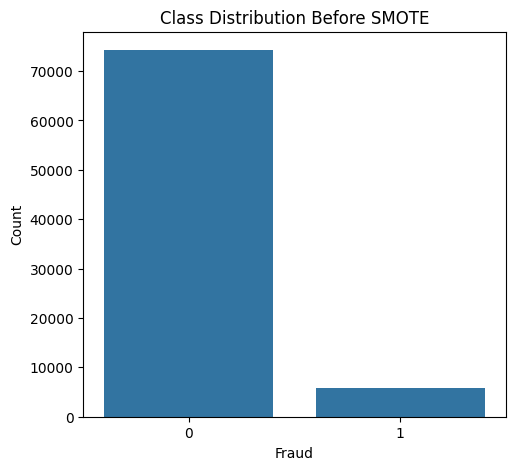

In [23]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Fraud')
plt.ylabel('Count')

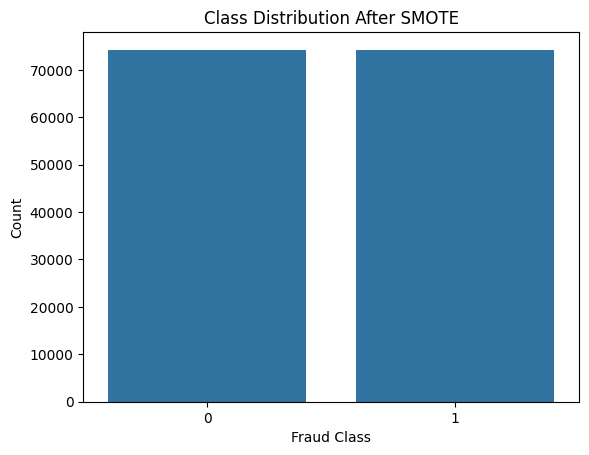

In [24]:
sns.countplot(x=pd.Series(y_train_resampled, name="Fraud"))
plt.title("Class Distribution After SMOTE")
plt.xlabel("Fraud Class")
plt.ylabel("Count")
plt.show()

#### Feature Selection

This code preprocesses the test data using the same **ColumnTransformer** fitted on the training set to ensure consistent encoding and scaling. It then converts the sparse matrices to dense arrays so that individual feature values can be directly modified. Next, it identifies the **‘Amount’** feature in the transformed data and increases its weight by multiplying it by 2.0, giving it more influence during model training and prediction. It prints the mean and standard deviation of the weighted **‘Amount’** feature for verification or a warning if the feature is not found. Finally, it updates the training and test feature sets with this weighting and prints their shapes to confirm the data is ready for modeling.


In [25]:
# --- Preprocess Test Data ---
X_test_processed = preprocessor.transform(X_test)  # Transform test data using fitted preprocessor

# --- Feature Weighting: Only Weight 'Amount' Feature ---
X_train_resampled_dense = X_train_resampled.toarray()
X_test_processed_dense = X_test_processed.toarray()

feature_names = preprocessor.get_feature_names_out()

# Only give high weight to 'Amount'
important_feature = 'num__Amount'
amount_weight = 2.0

if important_feature in feature_names:
    feature_idx = list(feature_names).index(important_feature)
    X_train_resampled_dense[:, feature_idx] *= amount_weight
    X_test_processed_dense[:, feature_idx] *= amount_weight
    print(f"{important_feature}: Mean = {X_train_resampled_dense[:, feature_idx].mean():.4f}, Std = {X_train_resampled_dense[:, feature_idx].std():.4f}")
else:
    print(f"Warning: Feature {important_feature} not found in preprocessed data.")

# Update data for models
X_train_weighted = X_train_resampled_dense
X_test_weighted = X_test_processed_dense
print(f"X_train_weighted shape: {X_train_weighted.shape}")
print(f"X_test_weighted shape: {X_test_weighted.shape}")


num__Amount: Mean = -0.3834, Std = 1.8836
X_train_weighted shape: (148488, 50)
X_test_weighted shape: (20000, 50)


#### Logistic regression 



$$  P(y=1∣x)= 1+e −(β 0​+β1​x 1​+β 2​x 2​+⋯+β n​x n​)1​ $$

This code trains a Logistic Regression classifier using the weighted training data where the ‘Amount’ feature has extra influence. After training, it predicts both the fraud labels and the probability of fraud for the test data. It calculates standard evaluation metrics — accuracy, precision, recall, F1-score, and ROC AUC — to measure how well the model detects fraud. It then examines the uncertainty of the fraud predictions by checking how far their predicted probabilities are from 0.5, which indicates maximum uncertainty. Finally, it prints a detailed classification report, plots the confusion matrix to show correct vs. incorrect classifications, and helps visualize how the model is performing in distinguishing fraud from non-fraud cases.

In [26]:
# --- Train Logistic Regression Classifier on Weighted Data ---
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train_weighted, y_train_resampled)

# --- Predict Labels and Probabilities ---
y_pred_lr = lr_classifier.predict(X_test_weighted)
y_pred_proba_lr = lr_classifier.predict_proba(X_test_weighted)[:, 1]  # Probability for class 1

# --- Evaluate Performance Metrics ---
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label=1)
recall_lr = recall_score(y_test, y_pred_lr, pos_label=1)
f1_lr = f1_score(y_test, y_pred_lr, pos_label=1)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Get predicted probabilities for class 1 (fraud)
proba_fraud_class = y_pred_proba_lr[y_test == 1]

# --- Method 1: Std Dev from 0.5 (max uncertainty point) ---
uncertainty_scores = np.abs(proba_fraud_class - 0.5)

mean_uncertainty = np.mean(uncertainty_scores)
std_uncertainty = np.std(uncertainty_scores)


Logistic Regression Model Performance Metrics:
Accuracy:  0.9402
Precision: 0.5489
Recall:    0.9444
F1-Score:  0.6943
ROC AUC:   0.9829

Logistic Regression Classification Report:
              precision    recall  f1-score   support

No Fraud (0)       1.00      0.94      0.97     18561
   Fraud (1)       0.55      0.94      0.69      1439

    accuracy                           0.94     20000
   macro avg       0.77      0.94      0.83     20000
weighted avg       0.96      0.94      0.95     20000



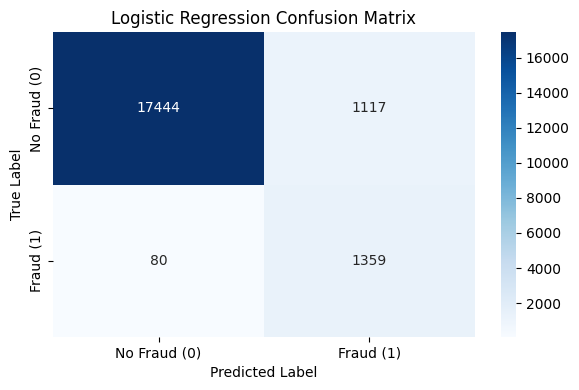

In [27]:

# --- Print Performance Metrics ---
print("\nLogistic Regression Model Performance Metrics:")
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")
print(f"ROC AUC:   {roc_auc_lr:.4f}")

# --- Classification Report ---
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Fraud (0)', 'Fraud (1)']))

# --- Confusion Matrix ---
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud (0)', 'Fraud (1)'],
            yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

This code prints the average and standard deviation of uncertainty scores for fraud predictions, showing how confidently the model predicts fraud cases. It then plots a histogram of all predicted fraud probabilities to visualize their overall distribution. Next, it separates these probabilities by the true class (fraud vs. no fraud) and overlays their distributions in a combined histogram for comparison. Finally, it prints summary statistics (mean and standard deviation) of predicted probabilities for all transactions, as well as separately for the fraud and non-fraud classes, helping to understand how well the model differentiates between them.


$$
p_{i} = P(y_{i} = 1 \mid x_{i})
$$

This means that for each transaction $i$, the model predicts the probability $p_{i}$ that the true class $y_{i}$ is fraud ($1$) given its features $x_{i}$. In other words, $p_{i}$ represents how likely the model thinks that transaction $i$ is fraudulent.

Uncertainty Statistics for Fraud Class (Logistic Regression):
Mean Uncertainty (|p - 0.5|): 0.4340
Std Dev of Uncertainty: 0.1097


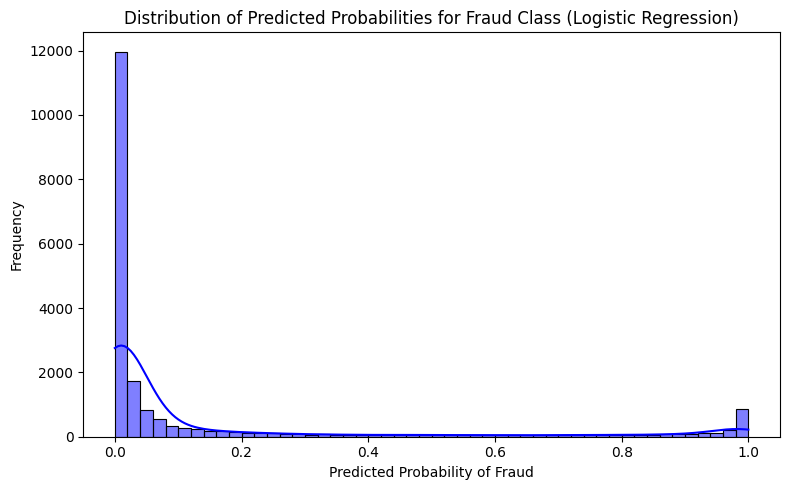

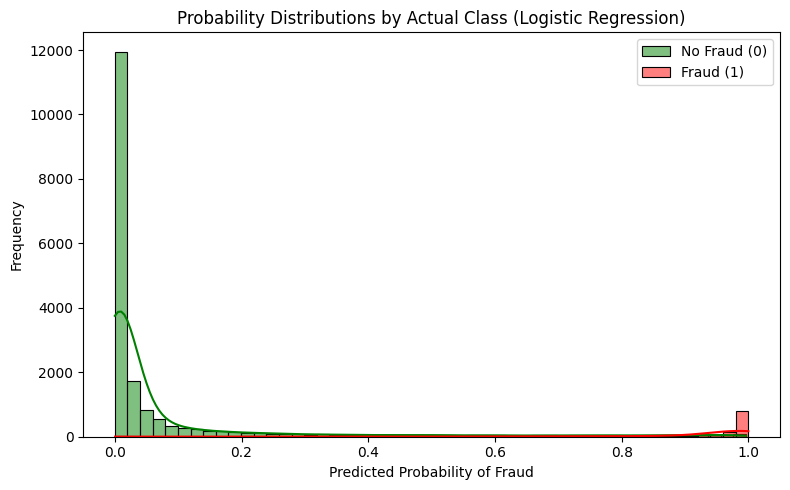


Summary Statistics of Predicted Probabilities for Fraud Class (Logistic Regression):
All Transactions:  Mean = 0.1427, Std = 0.2869
No Fraud (0):      Mean = 0.0837, Std = 0.1935
Fraud (1):         Mean = 0.9026, Std = 0.1956


In [28]:
print(f"Uncertainty Statistics for Fraud Class (Logistic Regression):")
print(f"Mean Uncertainty (|p - 0.5|): {mean_uncertainty:.4f}")
print(f"Std Dev of Uncertainty: {std_uncertainty:.4f}")

# --- Extract Probabilities for Fraud Class (1) ---
fraud_probs_lr = y_pred_proba_lr  # Already sliced [:, 1] earlier

# --- Histogram of All Fraud Probabilities ---
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_lr, bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities for Fraud Class (Logistic Regression)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- Separate Probabilities by True Class ---
fraud_probs_no_fraud_lr = fraud_probs_lr[y_test == 0]
fraud_probs_fraud_lr = fraud_probs_lr[y_test == 1]

# --- Overlayed Histogram for Class 0 vs 1 ---
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_no_fraud_lr, bins=50, kde=True, color='green', label='No Fraud (0)', alpha=0.5)
sns.histplot(fraud_probs_fraud_lr, bins=50, kde=True, color='red', label='Fraud (1)', alpha=0.5)
plt.title('Probability Distributions by Actual Class (Logistic Regression)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

# --- Summary Statistics ---
print("\nSummary Statistics of Predicted Probabilities for Fraud Class (Logistic Regression):")
print(f"All Transactions:  Mean = {np.mean(fraud_probs_lr):.4f}, Std = {np.std(fraud_probs_lr):.4f}")
print(f"No Fraud (0):      Mean = {np.mean(fraud_probs_no_fraud_lr):.4f}, Std = {np.std(fraud_probs_no_fraud_lr):.4f}")
print(f"Fraud (1):         Mean = {np.mean(fraud_probs_fraud_lr):.4f}, Std = {np.std(fraud_probs_fraud_lr):.4f}")


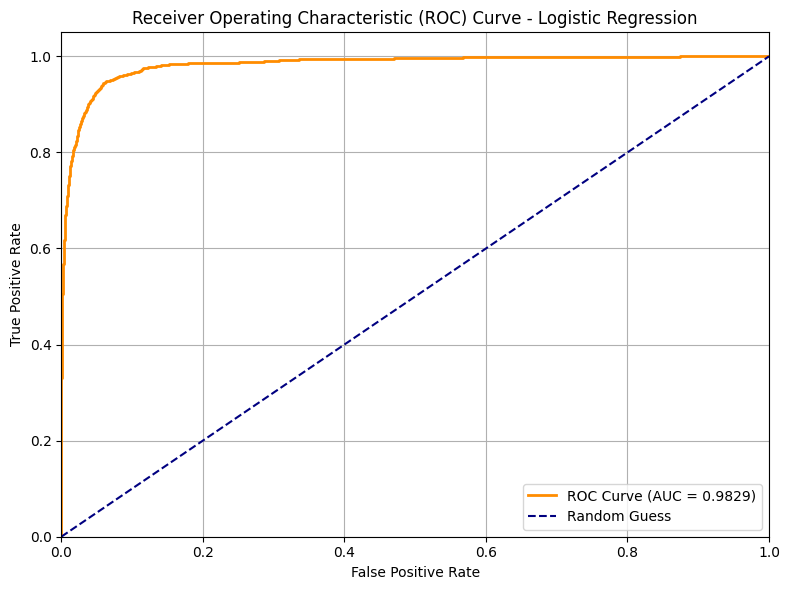

In [29]:
# --- Compute ROC Curve and AUC ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)

# --- Plot ROC Curve ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

##### Decesion Tree 

This code trains a **Decision Tree** classifier on the weighted training data to detect fraud. It then predicts both fraud labels and the probabilities of fraud on the test set. The model’s performance is evaluated using accuracy, precision, recall, F1-score, and ROC AUC metrics. For fraud cases specifically, it calculates uncertainty scores by measuring how far predicted probabilities are from 0.5, which indicates prediction confidence. Finally, it computes and stores the mean and standard deviation of these uncertainty scores to summarize how confidently the model predicts fraud.


$$ Gini=1−(p 
0
2
​
 +p 
1
2
​
 ) $$ 

In [30]:
# --- Train Decision Tree Classifier on Weighted Data ---
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_weighted, y_train_resampled)

# --- Predict Labels and Probabilities ---
y_pred_dt = dt_classifier.predict(X_test_weighted)
y_pred_proba_dt = dt_classifier.predict_proba(X_test_weighted)[:, 1]  # Probability for class 1 (Fraud)

# --- Evaluate Performance Metrics ---
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, pos_label=1)
recall_dt = recall_score(y_test, y_pred_dt, pos_label=1)
f1_dt = f1_score(y_test, y_pred_dt, pos_label=1)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# --- Uncertainty Statistics for Fraud Class (label = 1) ---
proba_fraud_dt = y_pred_proba_dt[y_test == 1]

# Method 1: Distance from 0.5
uncertainty_scores_dt = np.abs(proba_fraud_dt - 0.5)
mean_uncertainty_dt = np.mean(uncertainty_scores_dt)
std_uncertainty_dt = np.std(uncertainty_scores_dt)

This code plots the ROC curve for the Decision Tree model, highlighting its ability to distinguish fraud with the AUC score. It then prints key performance metrics—accuracy, precision, recall, F1-score, and ROC AUC—to summarize model effectiveness. A detailed classification report shows precision, recall, and F1 for each class. Finally, it visualizes the confusion matrix as a heatmap to display true vs. predicted fraud and non-fraud classifications.



Decision Tree Model Performance Metrics:
Accuracy : 0.9748
Precision: 0.8042
Recall   : 0.8589
F1-Score : 0.8306
ROC AUC  : 0.9214

Decision Tree Classification Report:
              precision    recall  f1-score   support

No Fraud (0)       0.99      0.98      0.99     18561
   Fraud (1)       0.80      0.86      0.83      1439

    accuracy                           0.97     20000
   macro avg       0.90      0.92      0.91     20000
weighted avg       0.98      0.97      0.98     20000



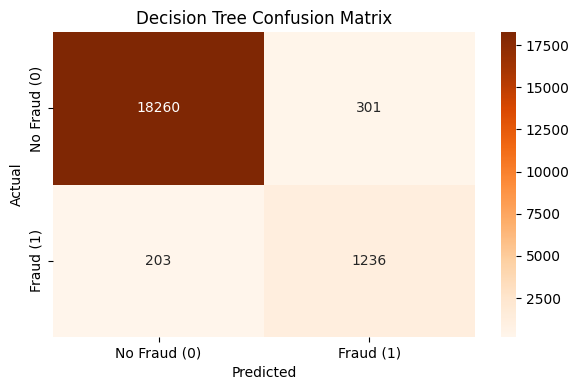

In [31]:
# --- Print Evaluation Results ---
print("\nDecision Tree Model Performance Metrics:")
print(f"Accuracy : {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall   : {recall_dt:.4f}")
print(f"F1-Score : {f1_dt:.4f}")
print(f"ROC AUC  : {roc_auc_dt:.4f}")

# --- Classification Report ---
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Fraud (0)', 'Fraud (1)']))

# --- Confusion Matrix ---
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Fraud (0)', 'Fraud (1)'],
            yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


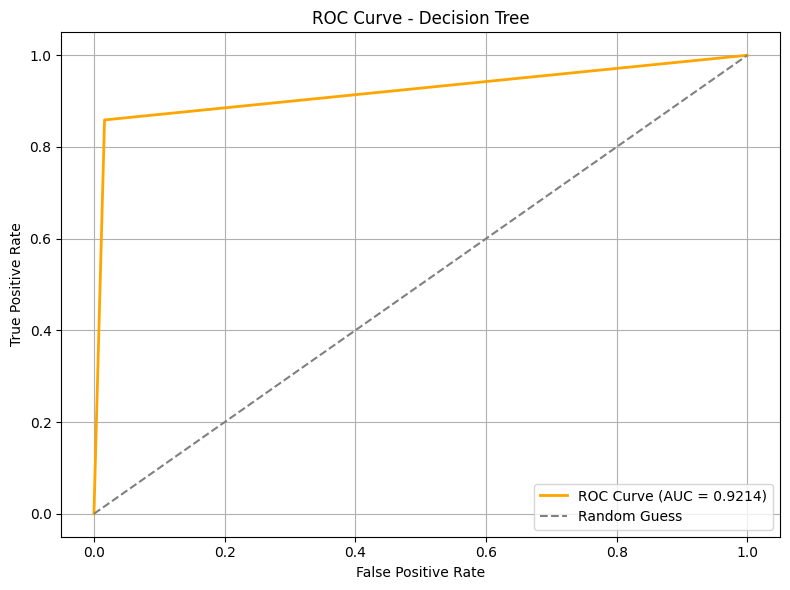

In [32]:
# --- ROC Curve ---
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='orange', lw=2, label=f'ROC Curve (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1.5, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

This code first prints the mean and standard deviation of how far predicted fraud probabilities are from 0.5 (uncertainty). Then, it plots a histogram of all predicted fraud probabilities to show their overall distribution. Next, it splits these probabilities by actual class (fraud vs. no fraud) and overlays their distributions to compare how well the model separates them. Finally, it prints summary statistics (mean and standard deviation) of these predicted probabilities for all transactions, no-fraud cases, and fraud cases to highlight class-wise prediction confidence.


$$ Uncertainty=∣p−0.5∣ $$ 

In [33]:
print("\nUncertainty Statistics for Fraud Class (label = 1):")
print(f"Mean |p - 0.5| : {mean_uncertainty_dt:.4f}")
print(f"Std Dev |p - 0.5|: {std_uncertainty_dt:.4f}")



Uncertainty Statistics for Fraud Class (label = 1):
Mean |p - 0.5| : 0.5000
Std Dev |p - 0.5|: 0.0000


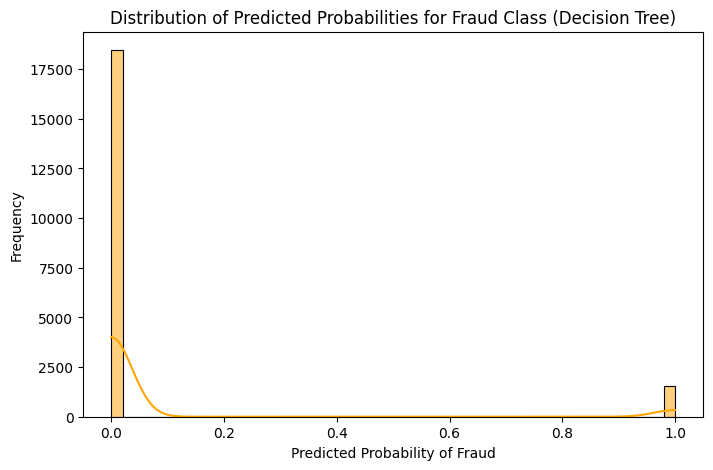

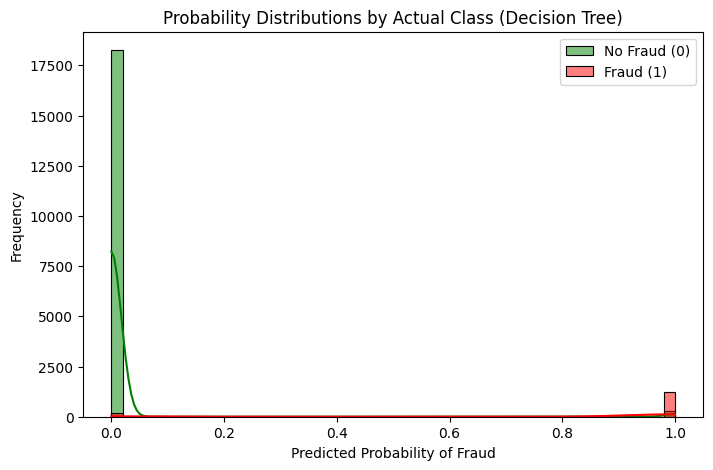


Summary Statistics of Predicted Probabilities for Fraud Class (Decision Tree):
All Transactions: Mean = 0.0769, Std = 0.2664
No Fraud (0): Mean = 0.0162, Std = 0.1263
Fraud (1): Mean = 0.8589, Std = 0.3481


In [34]:
# --- Probability Distribution Plots ---

# Extract probabilities for Fraud class (class 1)
fraud_probs_dt = y_pred_proba_dt

# Plot histogram of predicted probabilities for Fraud class
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_dt, bins=50, kde=True, color='orange')
plt.title('Distribution of Predicted Probabilities for Fraud Class (Decision Tree)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.show()

# Separate probabilities by actual class
fraud_probs_no_fraud_dt = fraud_probs_dt[y_test == 0]
fraud_probs_fraud_dt = fraud_probs_dt[y_test == 1]

# Plot probability distributions for both classes
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_no_fraud_dt, bins=50, kde=True, color='green', label='No Fraud (0)', alpha=0.5)
sns.histplot(fraud_probs_fraud_dt, bins=50, kde=True, color='red', label='Fraud (1)', alpha=0.5)
plt.title('Probability Distributions by Actual Class (Decision Tree)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print summary statistics of probabilities
print("\nSummary Statistics of Predicted Probabilities for Fraud Class (Decision Tree):")
print(f"All Transactions: Mean = {np.mean(fraud_probs_dt):.4f}, Std = {np.std(fraud_probs_dt):.4f}")
print(f"No Fraud (0): Mean = {np.mean(fraud_probs_no_fraud_dt):.4f}, Std = {np.std(fraud_probs_no_fraud_dt):.4f}")
print(f"Fraud (1): Mean = {np.mean(fraud_probs_fraud_dt):.4f}, Std = {np.std(fraud_probs_fraud_dt):.4f}")


#### Random Forest

This code trains a **Random Forest classifier** with 100 trees on the resampled, weighted training data. It predicts labels and fraud probabilities for the test set, then calculates standard performance metrics: **accuracy, precision, recall, F1-score, and ROC AUC**, showing how well the model detects fraud. It also computes the mean and standard deviation of the predicted fraud probabilities for actual fraud cases to understand prediction certainty. Finally, it prints these metrics and a detailed classification report to show precision, recall, and F1 for each class (No Fraud and Fraud).


$$ y^​=mode{h 1​(x),h 2​(x),...,h n​(x)} $$

In [78]:
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train_resampled_dense, y_train_resampled)
y_pred_rf = rf_classifier.predict(X_test_processed_dense)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_processed_dense)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label=1)
recall_rf = recall_score(y_test, y_pred_rf, pos_label=1)
f1_rf = f1_score(y_test, y_pred_rf, pos_label=1)

# --- Uncertainty Statistics for Fraud Class ---
fraud_probs_rf = y_pred_proba_rf[y_test == 1]
mean_prob_rf = np.mean(fraud_probs_rf)
std_prob_rf = np.std(fraud_probs_rf)


In [79]:
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])

# Print performance metrics
print("\nRandom Forest Model Performance Metrics:")
print(f"Accuracy : {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall   : {recall_rf:.4f}")
print(f"F1-Score : {f1_rf:.4f}")
print(f"ROC AUC  : {roc_auc_rf:.4f}")

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Fraud (0)', 'Fraud (1)']))


Random Forest Model Performance Metrics:
Accuracy : 0.9841
Precision: 0.9187
Recall   : 0.8555
F1-Score : 0.8859
ROC AUC  : 0.9934

Random Forest Classification Report:
              precision    recall  f1-score   support

No Fraud (0)       0.99      0.99      0.99     18561
   Fraud (1)       0.92      0.86      0.89      1439

    accuracy                           0.98     20000
   macro avg       0.95      0.92      0.94     20000
weighted avg       0.98      0.98      0.98     20000



This part plots the **Random Forest confusion matrix** to visualize true vs. predicted labels for fraud and non-fraud. It then shows how predicted fraud probabilities are distributed overall, and separately for actual fraud and non-fraud cases, using histograms with KDE curves. These plots help reveal how well the model separates fraud from non-fraud. Finally, it prints the mean and standard deviation of these predicted probabilities, highlighting how confident the model is for fraud predictions.


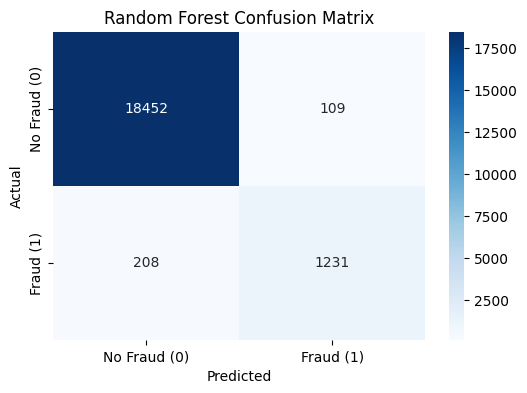

In [80]:
# Compute and plot confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud (0)', 'Fraud (1)'],
            yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

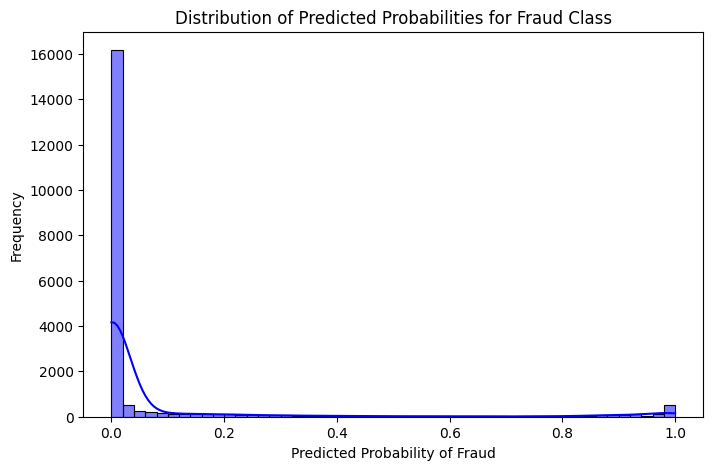

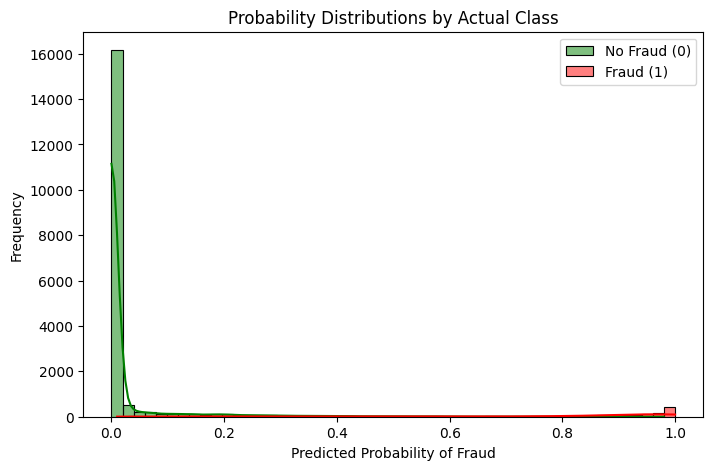


Summary Statistics of Predicted Probabilities for Fraud Class:
All Transactions: Mean = 0.0794, Std = 0.2309
No Fraud (0): Mean = 0.0221, Std = 0.0796
Fraud (1): Mean = 0.8188, Std = 0.2656

Uncertainty Statistics for Fraud Class (label = 1):
Mean Probability : 0.5000
Std Deviation    : 0.4149


In [82]:
fraud_probs = y_pred_proba_rf[:, 1]  # Probabilities for Fraud class (class 1)
# Plot histogram of predicted probabilities for Fraud class
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs, bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities for Fraud Class')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.show()

# Separate probabilities by actual class
fraud_probs_no_fraud = fraud_probs[y_test == 0]
fraud_probs_fraud = fraud_probs[y_test == 1]

# Plot probability distributions for both classes
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_no_fraud, bins=50, kde=True, color='green', label='No Fraud (0)', alpha=0.5)
sns.histplot(fraud_probs_fraud, bins=50, kde=True, color='red', label='Fraud (1)', alpha=0.5)
plt.title('Probability Distributions by Actual Class')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print summary statistics of probabilities
print("\nSummary Statistics of Predicted Probabilities for Fraud Class:")
print(f"All Transactions: Mean = {np.mean(fraud_probs):.4f}, Std = {np.std(fraud_probs):.4f}")
print(f"No Fraud (0): Mean = {np.mean(fraud_probs_no_fraud):.4f}, Std = {np.std(fraud_probs_no_fraud):.4f}")
print(f"Fraud (1): Mean = {np.mean(fraud_probs_fraud):.4f}, Std = {np.std(fraud_probs_fraud):.4f}")

print("\nUncertainty Statistics for Fraud Class (label = 1):")
print(f"Mean Probability : {mean_prob_rf:.4f}")
print(f"Std Deviation    : {std_prob_rf:.4f}")


#### XG boost

This code trains an **XGBoost classifier** on the resampled training data and predicts fraud on the test set. It computes key performance metrics — accuracy, precision, recall, F1-score, and ROC AUC — to evaluate how well the model detects fraud. The classification report breaks down precision, recall, and F1 for each class. The confusion matrix is plotted to show correct and incorrect predictions for fraud and non-fraud transactions. This visual and numerical analysis checks if XGBoost effectively separates fraudulent and legitimate cases.


$$
\mathcal{L}^{(t)} = \sum_{i=1}^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{k=1}^{t} \Omega(f_k)
$$



In [74]:
# Initialize and train XGBoost classifier (removed deprecated parameter)
xgb_classifier = XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss')
xgb_classifier.fit(X_train_resampled_dense, y_train_resampled)

# Predict on test set
y_pred_xgb = xgb_classifier.predict(X_test_processed_dense)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_processed_dense)

# Calculate performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, pos_label=1)
recall_xgb = recall_score(y_test, y_pred_xgb, pos_label=1)
f1_xgb = f1_score(y_test, y_pred_xgb, pos_label=1)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb[:, 1])


XGBoost Model Performance Metrics:
Accuracy: 0.9852
Precision: 0.9340
Recall: 0.8555
F1-Score: 0.8930
ROC AUC Score: 0.9939

XGBoost Classification Report:
              precision    recall  f1-score   support

No Fraud (0)       0.99      1.00      0.99     18561
   Fraud (1)       0.93      0.86      0.89      1439

    accuracy                           0.99     20000
   macro avg       0.96      0.93      0.94     20000
weighted avg       0.98      0.99      0.98     20000



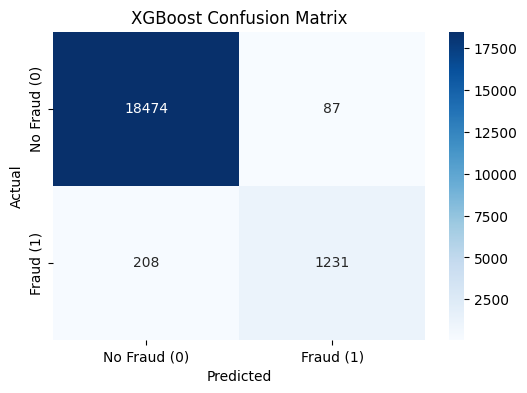

In [40]:
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb[:, 1])
# Print performance metrics
print("\nXGBoost Model Performance Metrics:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

# Print classification report
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['No Fraud (0)', 'Fraud (1)']))

# Compute and plot confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud (0)', 'Fraud (1)'],
            yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This code block calculates **uncertainty statistics** for the fraud class by finding the mean and standard deviation of predicted fraud probabilities from the XGBoost model. It plots a histogram of these predicted fraud probabilities to show how confident the model is overall. Then, it separates probabilities for actual fraud and non-fraud cases and visualizes both distributions for comparison. This helps check if the model assigns higher probabilities to true frauds and lower to genuine transactions. Finally, it prints summary statistics — means and standard deviations — for all transactions and by class, providing insight into prediction spread and overlap.


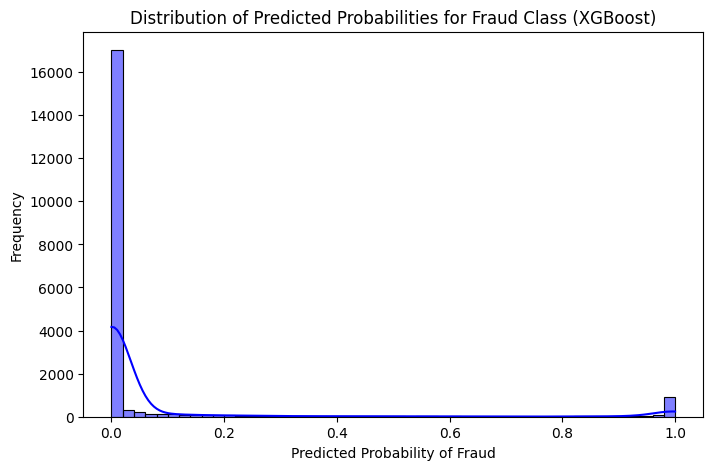

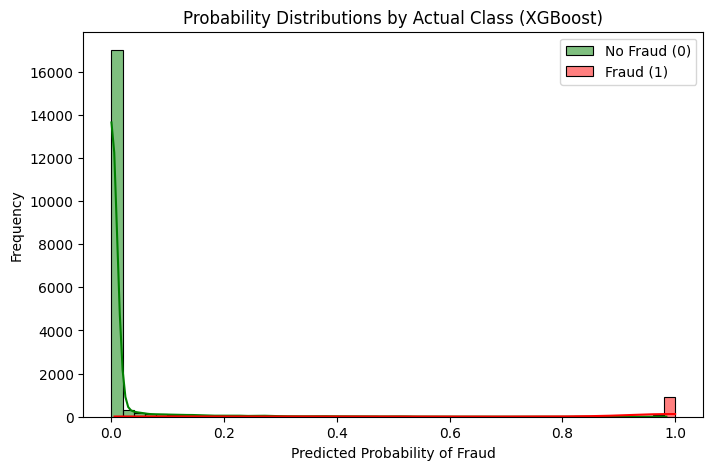


Summary Statistics of Predicted Probabilities for Fraud Class (XGBoost):
All Transactions: Mean = 0.0753, Std = 0.2397
No Fraud (0): Mean = 0.0151, Std = 0.0687
Fraud (1): Mean = 0.8519, Std = 0.2957

Uncertainty Statistics for Fraud Class (label = 1):
Mean Probability : 0.5000
Std Deviation    : 0.4597


In [76]:
# --- Uncertainty Statistics for Fraud Class ---
fraud_probs_xgb = y_pred_proba_xgb[y_test == 1]
mean_prob_xgb = np.mean(fraud_probs_xgb)
std_prob_xgb = np.std(fraud_probs_xgb)

# Extract probabilities for Fraud class (class 1)
fraud_probs_xgb = y_pred_proba_xgb[:, 1]

# Plot histogram of predicted probabilities for Fraud class
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_xgb, bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities for Fraud Class (XGBoost)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.show()

# Separate probabilities by actual class
fraud_probs_no_fraud_xgb = fraud_probs_xgb[y_test == 0]
fraud_probs_fraud_xgb = fraud_probs_xgb[y_test == 1]

# Plot probability distributions for both classes
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_no_fraud_xgb, bins=50, kde=True, color='green', label='No Fraud (0)')
sns.histplot(fraud_probs_fraud_xgb, bins=50, kde=True, color='red', label='Fraud (1)')
plt.title('Probability Distributions by Actual Class (XGBoost)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print summary statistics of probabilities
print("\nSummary Statistics of Predicted Probabilities for Fraud Class (XGBoost):")
print(f"All Transactions: Mean = {np.mean(fraud_probs_xgb):.4f}, Std = {np.std(fraud_probs_xgb):.4f}")
print(f"No Fraud (0): Mean = {np.mean(fraud_probs_no_fraud_xgb):.4f}, Std = {np.std(fraud_probs_no_fraud_xgb):.4f}")
print(f"Fraud (1): Mean = {np.mean(fraud_probs_fraud_xgb):.4f}, Std = {np.std(fraud_probs_fraud_xgb):.4f}")

# --- Print Results ---
print("\nUncertainty Statistics for Fraud Class (label = 1):")
print(f"Mean Probability : {mean_prob_xgb:.4f}")
print(f"Std Deviation    : {std_prob_xgb:.4f}")

This code extracts the predicted probabilities for the positive class (fraud) from the XGBoost model and computes the ROC curve data (FPR, TPR, thresholds). It then calculates the ROC AUC score, which measures how well the model separates fraud from non-fraud. The ROC curve is plotted, showing the trade-off between the true positive rate and false positive rate. The diagonal line represents a random classifier for comparison. This plot visually demonstrates the XGBoost model’s ability to discriminate between the two classes.


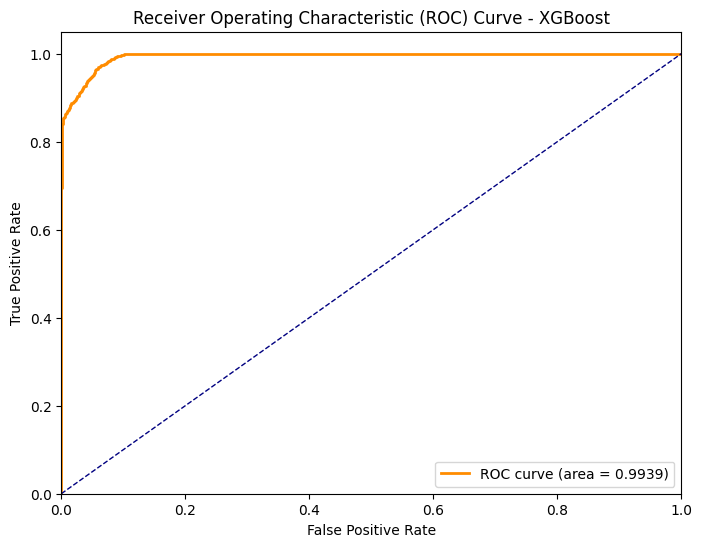

In [42]:
# Use probabilities of positive class (class 1)
y_pred_proba_pos = y_pred_proba_xgb[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_pos)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')  # Diagonal for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

##### Untrained model 

This code defines an untrained neural network with an input size of 50 features, three hidden layers with ReLU activations, and dropout for regularization. It uses the Adam optimizer with a specified learning rate and binary cross-entropy loss for binary classification. The `model.summary()` prints the architecture details before training. Predictions are then generated on the test set without training, so outputs are random. These raw predictions are thresholded at 0.5 to get class labels. Finally, standard performance metrics (accuracy, precision, recall, F1-score, and ROC AUC) are computed to show how an untrained model performs as a baseline.


In [83]:
tf.random.set_seed(42)
np.random.seed(42)
input_dim = 50
model = Sequential([
    Dense(units=64, activation='relu', input_dim=input_dim),
    Dropout(0.1),
    Dense(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008109580298064357),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
warnings.filterwarnings("ignore", message="Do not pass an `input_shape`/`input_dim` argument to a layer.*")
# Print model summary
print("Untrained Neural Network Model Summary:")
model.summary()

# Generate predictions on test set without training
y_pred_proba = model.predict(X_test_processed_dense)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
recall = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
f1 = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba.flatten())
print("\nUntrained Neural Network Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Untrained Neural Network Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,873 (62.00 KB)

 Trainable params: 15,873 (62.00 KB)

 Non-trainable params: 0 (0.00 B)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Untrained Neural Network Performance Metrics:
Accuracy: 0.0732
Precision: 0.0717
Recall: 0.9951
F1-Score: 0.1338
ROC AUC: 0.4212


#### Neural Networks

This code defines a custom neural network search space for fraud detection using Keras Tuner. First, it converts sparse training and test sets to dense arrays for TensorFlow. The FraudDetectionHyperModel class subclasses HyperModel and builds a tunable network: it sets the input layer’s units and dropout, then adds 1–3 hidden layers with tunable units and dropout rates. The output layer uses a sigmoid for binary classification. The model is compiled with Adam optimizer, whose learning rate is also tunable. The MyTuner class extends RandomSearch to make batch size a tunable parameter too, by overriding run_trial.

$$ y
^
​
 =σ(w 
(L)
 ⋅ReLU(w 
(L−1)
 ⋅…ReLU(w 
(1)
 ⋅x+b 
(1)
 )⋯+b 
(L−1)
 )+b 
(L)
 ) $$

In [46]:
X_train_resampled_dense = X_train_resampled.toarray()
X_test_processed_dense = X_test_processed.toarray()

class FraudDetectionHyperModel(HyperModel):
    def __init__(self, input_dim):
        self.input_dim = input_dim

    def build(self, hp):
        model = Sequential()
        # Input layer
        model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                        activation='relu', input_dim=self.input_dim))
        model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

        # Hidden layers (tunable layers)
        for i in range(hp.Int('num_layers', 1, 3)):
            model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=16, max_value=128, step=16),
                            activation='relu'))
            model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Compile model
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
            loss='binary_crossentropy',
            metrics=['accuracy']
        )
        return model

# Custom tuner to include batch size as a hyperparameter
class MyTuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters
        kwargs['batch_size'] = hp.Int('batch_size', 32, 128, step=32)
        return super().run_trial(trial, *args, **kwargs)

This block runs hyperparameter tuning and training for your neural network. It starts by turning off `UserWarning` messages, then creates an instance of your `FraudDetectionHyperModel` with the correct input dimension. A custom `MyTuner` is initialized to perform a random search for the best hyperparameters with 5 trials and 2 executions each. The tuner searches for the best model by training on the resampled training data for 10 epochs, using 20% of it for validation. Once the search finishes, it retrieves the best model and prints its optimal hyperparameters. Finally, the best model is retrained for 20 epochs using the best batch size and predicts on the test data.


In [47]:
warnings.filterwarnings("ignore", category=UserWarning)
# Initialize HyperModel and Tuner
input_dim = X_train_resampled_dense.shape[1]
hypermodel = FraudDetectionHyperModel(input_dim=input_dim)

tuner = MyTuner(
    hypermodel=hypermodel,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=2,
    directory='tuner_dir',
    project_name='fraud_detection'
)

# Search best hyperparameters
tuner.search(
    X_train_resampled_dense, y_train_resampled,
    epochs=10,
    validation_split=0.2,
    verbose=1
)
# Get the best model and hyperparameters
best_model = tuner.get_best_models()[0]
best_hyperparameters = tuner.get_best_hyperparameters()[0]

# Print best hyperparameters
print("\nBest Hyperparameters:")
for param, value in best_hyperparameters.values.items():
    print(f"{param}: {value}")

# Train best model with optimal batch size
history = best_model.fit(
    X_train_resampled_dense, y_train_resampled,
    epochs=20,
    batch_size=best_hyperparameters.get('batch_size'),
    validation_split=0.2,
    verbose=1
)
# Predict and evaluate on the test set
y_pred_proba_nn = best_model.predict(X_test_processed_dense)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int).flatten()

Trial 5 Complete [00h 03m 06s]
val_accuracy: 0.9783318638801575

Best val_accuracy So Far: 0.9849148094654083
Total elapsed time: 01h 54m 12s

Best Hyperparameters:
units_1: 128
dropout_1: 0.4
num_layers: 1
units_2: 112
dropout_2: 0.1
learning_rate: 0.005600608682336383
batch_size: 32
Epoch 1/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.9654 - loss: 0.0807 - val_accuracy: 0.9839 - val_loss: 0.0790
Epoch 2/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9668 - loss: 0.0763 - val_accuracy: 0.9756 - val_loss: 0.0749
Epoch 3/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9683 - loss: 0.0733 - val_accuracy: 0.9788 - val_loss: 0.0771
Epoch 4/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9694 - loss: 0.0721 - val_accuracy: 0.9762 - val_loss: 0.0866
Epoch 5/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.9703 - loss: 0.0717 - val_accuracy: 0.9736 - val_loss: 0.0832
Epoch 6/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - ac

This block first plots two subplots showing how your neural network’s training and validation accuracy and loss changed over each epoch, helping you see if the model overfits or underfits. Then it calculates the final performance metrics — accuracy, precision, recall, F1 score, and ROC AUC — on the test data using your tuned neural network’s predictions. Finally, it prints these metrics so you can compare them with other models and see how well your tuned network detects fraud.


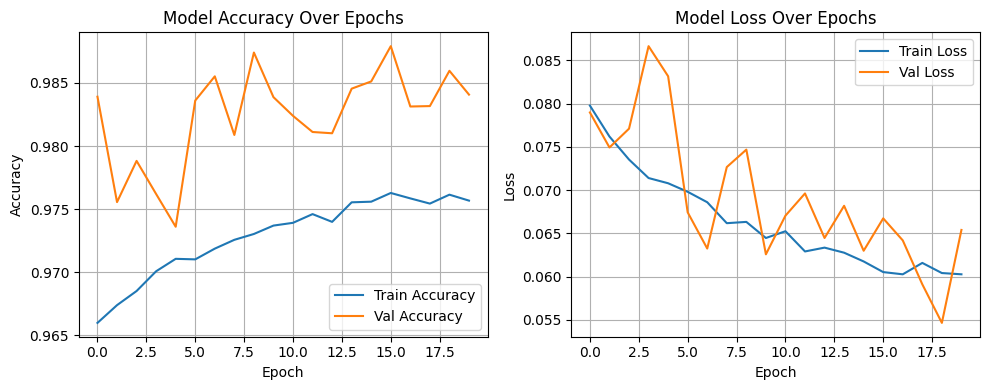

In [48]:
# Accuracy Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [49]:
# Calculate performance metrics
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, pos_label=1)
recall_nn = recall_score(y_test, y_pred_nn, pos_label=1)
f1_nn = f1_score(y_test, y_pred_nn, pos_label=1)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn.flatten())

# Print results
print("\nNeural Network Performance:")
print(f"Accuracy:  {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall:    {recall_nn:.4f}")
print(f"F1 Score:  {f1_nn:.4f}")
print(f"ROC AUC: {roc_auc_nn:.4f}")


Neural Network Performance:
Accuracy:  0.9748
Precision: 0.7892
Recall:    0.8874
F1 Score:  0.8355
ROC AUC: 0.9925


This code computes and plots the ROC curve for the neural network’s fraud predictions to visualize its trade-off between true positive and false positive rates, along with the ROC AUC score as a performance summary. It then displays the confusion matrix showing actual vs. predicted fraud classifications to assess errors. Training history plots visualize how accuracy and loss changed during training for both training and validation sets, helping identify model fit. Finally, it plots the distribution of predicted fraud probabilities overall and separated by actual class, showing how confident the model is. Summary statistics of these probabilities give a numeric overview of prediction confidence for all transactions, no-fraud, and fraud cases.


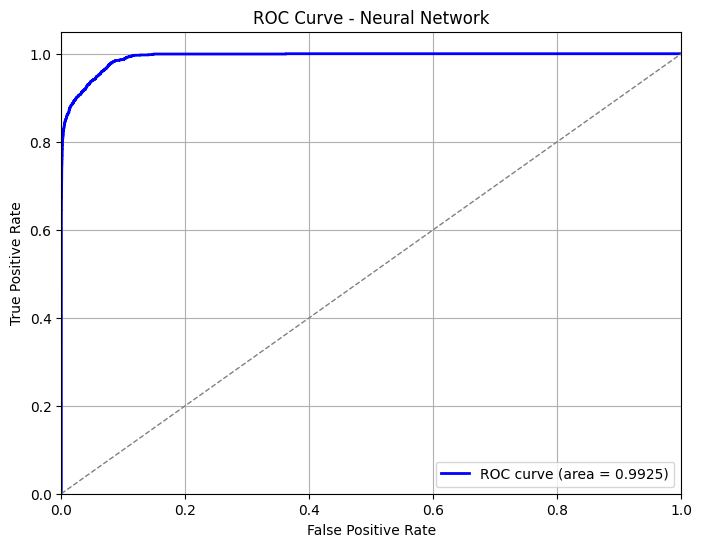

In [50]:
# Compute ROC curve and ROC area for the neural network
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nn.flatten())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

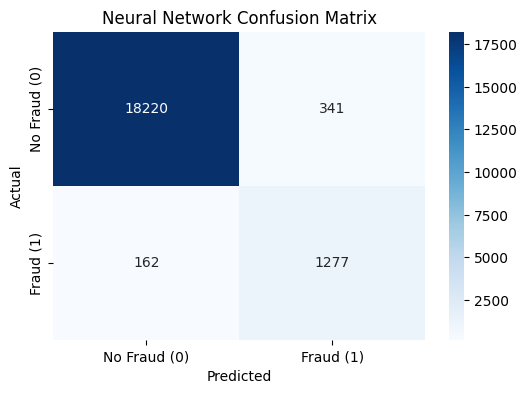

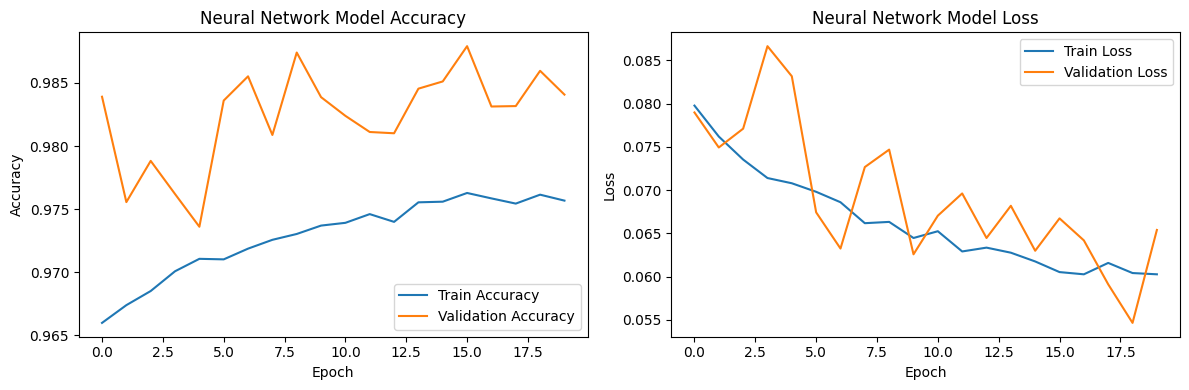

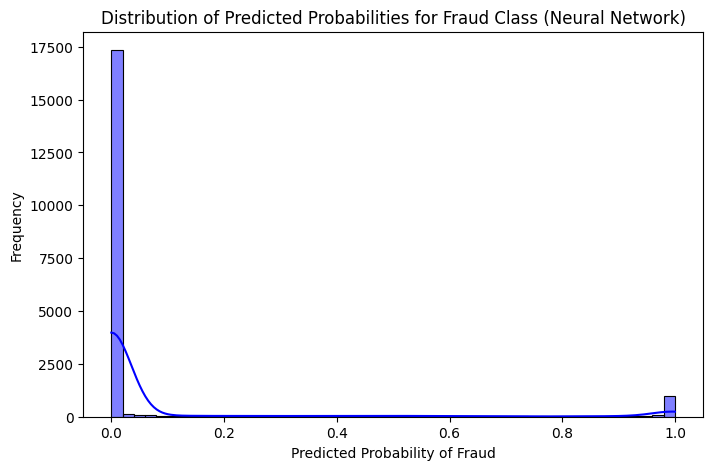

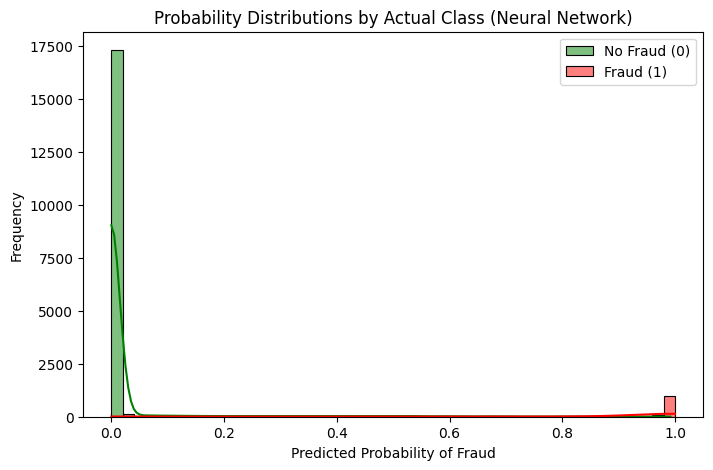


Summary Statistics of Predicted Probabilities for Fraud Class (Neural Network):
All Transactions: Mean = 0.0847, Std = 0.2538
No Fraud (0): Mean = 0.0236, Std = 0.1082
Fraud (1): Mean = 0.8726, Std = 0.2742


In [51]:
#Confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud (0)', 'Fraud (1)'],
            yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Probability distributions
fraud_probs_nn = y_pred_proba_nn.flatten()
fraud_probs_no_fraud_nn = fraud_probs_nn[y_test == 0]
fraud_probs_fraud_nn = fraud_probs_nn[y_test == 1]

plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_nn, bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities for Fraud Class (Neural Network)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_no_fraud_nn, bins=50, kde=True, color='green', label='No Fraud (0)')
sns.histplot(fraud_probs_fraud_nn, bins=50, kde=True, color='red', label='Fraud (1)')
plt.title('Probability Distributions by Actual Class (Neural Network)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("\nSummary Statistics of Predicted Probabilities for Fraud Class (Neural Network):")
print(f"All Transactions: Mean = {np.mean(fraud_probs_nn):.4f}, Std = {np.std(fraud_probs_nn):.4f}")
print(f"No Fraud (0): Mean = {np.mean(fraud_probs_no_fraud_nn):.4f}, Std = {np.std(fraud_probs_no_fraud_nn):.4f}")
print(f"Fraud (1): Mean = {np.mean(fraud_probs_fraud_nn):.4f}, Std = {np.std(fraud_probs_fraud_nn):.4f}")



This code performs uncertainty quantification using Monte Carlo Dropout by running the neural network multiple times with dropout enabled during prediction to simulate variability. It calculates the mean predicted probability and the standard deviation (uncertainty) for each test sample across these runs. The plot shows predicted fraud probabilities for the first 50 test samples, with error bars representing the uncertainty. It then focuses on actual fraud cases to compute and print the average uncertainty and its variation specifically for those samples, indicating how confident the model is about fraud predictions.


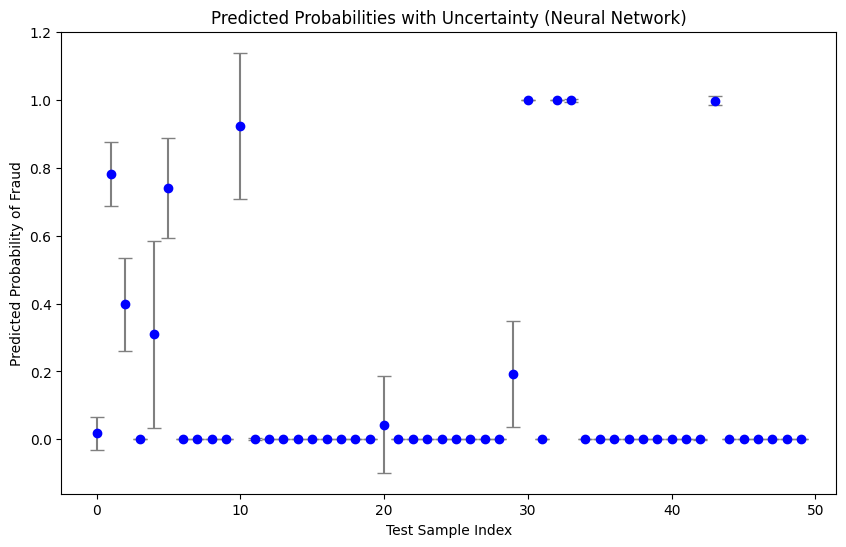


Uncertainty Statistics for Fraud Class (Neural Network):
Mean Uncertainty (Std Dev of Predictions): 0.0597
Std Dev of Uncertainty: 0.0814


In [52]:
# Uncertainty quantification (Monte Carlo Dropout)
# Run multiple stochastic forward passes with dropout active (training=True)
n_samples = 100
y_pred_samples = np.array([
    best_model(X_test_processed_dense, training=True).numpy().flatten()
    for _ in range(n_samples)
])

y_pred_mean = y_pred_samples.mean(axis=0)
y_pred_std = y_pred_samples.std(axis=0)

# Plot uncertainty for first 50 test samples
n_subset = 50
plt.figure(figsize=(10, 6))
plt.errorbar(range(n_subset), y_pred_mean[:n_subset], yerr=y_pred_std[:n_subset],
             fmt='o', color='blue', ecolor='gray', capsize=5)
plt.title('Predicted Probabilities with Uncertainty (Neural Network)')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Probability of Fraud')
plt.show()

# Uncertainty stats for fraud class
fraud_indices = np.where(y_test == 1)[0]
print("\nUncertainty Statistics for Fraud Class (Neural Network):")
print(f"Mean Uncertainty (Std Dev of Predictions): {np.mean(y_pred_std[fraud_indices]):.4f}")
print(f"Std Dev of Uncertainty: {np.std(y_pred_std[fraud_indices]):.4f}")

### CNN model 

This code builds a **probabilistic 1D CNN** hypermodel for fraud detection using Keras Tuner.
It reshapes tabular input into `(samples, timesteps, channels)` for **Conv1D** processing.
The model starts with a tunable **Conv1D layer**, **max pooling**, and **dropout** for feature extraction.
It adds an extra tunable **Conv1D block** based on hyperparameters to deepen learning.
Features are **flattened** and passed through a tunable dense layer with dropout for regularization.
The output layer produces **logits** for a Bernoulli distribution, supporting probabilistic predictions.
It’s compiled with **binary crossentropy (logits)** and an **Adam optimizer** with a tunable learning rate.


$$
\hat{y} = \sigma \Big( W_{\text{out}} \cdot f(X) + b_{\text{out}} \Big)
$$


In [53]:
tfd = tfp.distributions

# Reshape data for 1D CNN: (samples, timesteps, channels)
n_features = X_train_resampled_dense.shape[1]
X_train_cnn = X_train_resampled_dense.reshape((X_train_resampled_dense.shape[0], n_features, 1))
X_test_cnn = X_test_processed_dense.reshape((X_test_processed_dense.shape[0], n_features, 1))

print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")

# Define Probabilistic CNN HyperModel
class FraudDetectionProbCNNHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = tf.keras.Sequential()
        # Convolutional layers
        model.add(tf.keras.layers.Conv1D(
            filters=hp.Int('filters_1', min_value=32, max_value=128, step=32),
            kernel_size=hp.Int('kernel_size_1', min_value=3, max_value=5, step=1),
            activation='relu',
            input_shape=self.input_shape,
            padding='same'  # Add padding to handle small input sizes
        ))
        model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
        model.add(tf.keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))

        # Additional Conv1D layer (tunable)
        for i in range(hp.Int('num_conv_layers', 1, 2)):
            model.add(tf.keras.layers.Conv1D(
                filters=hp.Int(f'filters_{i+2}', min_value=16, max_value=64, step=16),
                kernel_size=hp.Int(f'kernel_size_{i+2}', min_value=3, max_value=5, step=1),
                activation='relu',
                padding='same'
            ))
            model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
            model.add(tf.keras.layers.Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))

        # Flatten and Dense layers
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(
            units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
            activation='relu'
        ))
        model.add(tf.keras.layers.Dropout(hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)))

        # Output layer: Logits for Bernoulli distribution
        model.add(tf.keras.layers.Dense(1))  # Output logits, no activation

        # Compile model with binary crossentropy loss (logits=True for Bernoulli)
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy']
        )
        return model

X_train_cnn shape: (148488, 50, 1)
X_test_cnn shape: (20000, 50, 1)


This defines a **custom tuner** (`MyProbCNNtuner`) to add **batch size** as a tunable hyperparameter.
It overrides `run_trial` to set **batch size** for each trial during tuning.
The `FraudDetectionProbCNNHyperModel` is initialized with the **CNN input shape**.
The custom tuner uses **RandomSearch** to explore hyperparameters for accuracy.
It runs the search on training data with **validation split** for 10 epochs.
The tuner directory stores the results and overwrites old runs to avoid conflicts.


In [54]:
# Custom tuner to include batch size
class MyProbCNNtuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters
        kwargs['batch_size'] = hp.Int('batch_size', 32, 128, step=32)
        return super().run_trial(trial, *args, **kwargs)

# Initialize HyperModel and Tuner
input_shape = (n_features, 1)
hypermodel_prob_cnn = FraudDetectionProbCNNHyperModel(input_shape=input_shape)
tuner_prob_cnn = MyProbCNNtuner(
    hypermodel=hypermodel_prob_cnn,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory='tuner_dir_prob_cnn',
    project_name='fraud_detection_prob_cnn',
    overwrite=True  # Overwrite previous tuner state to avoid conflicts
)

# Search for best hyperparameters
tuner_prob_cnn.search(
    X_train_cnn, y_train_resampled,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Trial 3 Complete [00h 03m 52s]
val_accuracy: 0.9533975422382355

Best val_accuracy So Far: 0.9881473481655121
Total elapsed time: 00h 58m 12s


This code hides warnings and retrieves the **best CNN model and hyperparameters** from the tuner.
It prints the chosen hyperparameters and retrains the best model for **20 epochs** using the best batch size.
The model predicts **logits**, which are converted to probabilities and a **Bernoulli distribution** for sampling binary outcomes.
It samples **probabilistic predictions** (0 or 1) from the distribution.
Finally, it computes **accuracy, precision, recall, F1-score, and ROC AUC** to evaluate performance.


In [55]:
warnings.filterwarnings("ignore", category=UserWarning)
# Get the best model and hyperparameters
best_prob_cnn_model = tuner_prob_cnn.get_best_models(num_models=1)[0]
best_prob_cnn_hyperparameters = tuner_prob_cnn.get_best_hyperparameters(num_trials=1)[0]
print("\nBest Probabilistic CNN Hyperparameters:")
for param, value in best_prob_cnn_hyperparameters.values.items():
    print(f"{param}: {value}")

# Train best model
history_prob_cnn = best_prob_cnn_model.fit(
    X_train_cnn, y_train_resampled,
    epochs=20,
    batch_size=best_prob_cnn_hyperparameters.get('batch_size'),
    validation_split=0.2,
    verbose=1
)

# Predict and evaluate
# Get logits and convert to Bernoulli distribution for probabilistic output
logits = best_prob_cnn_model.predict(X_test_cnn)
y_pred_proba_cnn = tf.sigmoid(logits).numpy().flatten()  # Convert logits to probabilities
y_pred_dist = tfd.Bernoulli(logits=logits)  # Create Bernoulli distribution
y_pred_cnn = y_pred_dist.sample().numpy().flatten()  # Sample binary predictions (0 or 1)

# Calculate performance metrics
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn, pos_label=1)
recall_cnn = recall_score(y_test, y_pred_cnn, pos_label=1)
f1_cnn = f1_score(y_test, y_pred_cnn, pos_label=1)
roc_auc_cnn = roc_auc_score(y_test, y_pred_proba_cnn)


Best Probabilistic CNN Hyperparameters:
filters_1: 64
kernel_size_1: 5
dropout_1: 0.0
num_conv_layers: 2
filters_2: 48
kernel_size_2: 4
dropout_2: 0.4
dense_units: 64
dense_dropout: 0.0
learning_rate: 0.00373177247900463
batch_size: 32
filters_3: 16
kernel_size_3: 3
dropout_3: 0.0
Epoch 1/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9774 - loss: 0.0584 - val_accuracy: 0.9708 - val_loss: 0.0565
Epoch 2/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9778 - loss: 0.0550 - val_accuracy: 0.9642 - val_loss: 0.0595
Epoch 3/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9780 - loss: 0.0547 - val_accuracy: 0.9577 - val_loss: 0.0691
Epoch 4/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9802 - loss: 0.0494 - val_accuracy: 0.9658 - val_loss: 0.0593
Epoch 5/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9807 - loss: 0.0488 - val_accuracy: 0.9778 - val_loss: 0.0399
Epoch 6/20
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accur

This prints the **probabilistic CNN’s performance metrics** and a full classification report for both classes.
It then calculates the **ROC curve** and **AUC** using the predicted probabilities.
The ROC curve is plotted with the AUC shown in the legend for context.
A diagonal line represents a **random classifier** for comparison.
Axes, title, legend, and grid make the plot clear and easy to interpret.


In [56]:
# Print results
print("\nProbabilistic CNN Performance:")
print(f"Accuracy: {accuracy_cnn:.4f}")
print(f"Precision: {precision_cnn:.4f}")
print(f"Recall: {recall_cnn:.4f}")
print(f"F1 Score: {f1_cnn:.4f}")
print(f"ROC AUC:  {roc_auc_cnn:.4f}")
# Classification report
print("\nProbabilistic CNN Classification Report:")
print(classification_report(y_test, y_pred_cnn, target_names=['No Fraud (0)', 'Fraud (1)']))


Probabilistic CNN Performance:
Accuracy: 0.9739
Precision: 0.8227
Recall: 0.8124
F1 Score: 0.8175
ROC AUC:  0.9931

Probabilistic CNN Classification Report:
              precision    recall  f1-score   support

No Fraud (0)       0.99      0.99      0.99     18561
   Fraud (1)       0.82      0.81      0.82      1439

    accuracy                           0.97     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.97      0.97      0.97     20000



This code first plots a **confusion matrix heatmap** to visualize true vs. predicted fraud classifications.
Next, it shows **training and validation accuracy and loss** over epochs to assess model learning and potential overfitting.
Then, it plots the **distribution of predicted fraud probabilities** across all test samples to understand model confidence.
Finally, it compares predicted probabilities for the **fraud and no-fraud classes separately** with overlaid histograms.
These visuals help interpret model performance, training behavior, and prediction uncertainty clearly.


$$
Y \sim \text{Bernoulli}\big(\sigma(z)\big) \quad \text{where} \quad z = W_{\text{out}} \cdot f(X) + b_{\text{out}}
$$


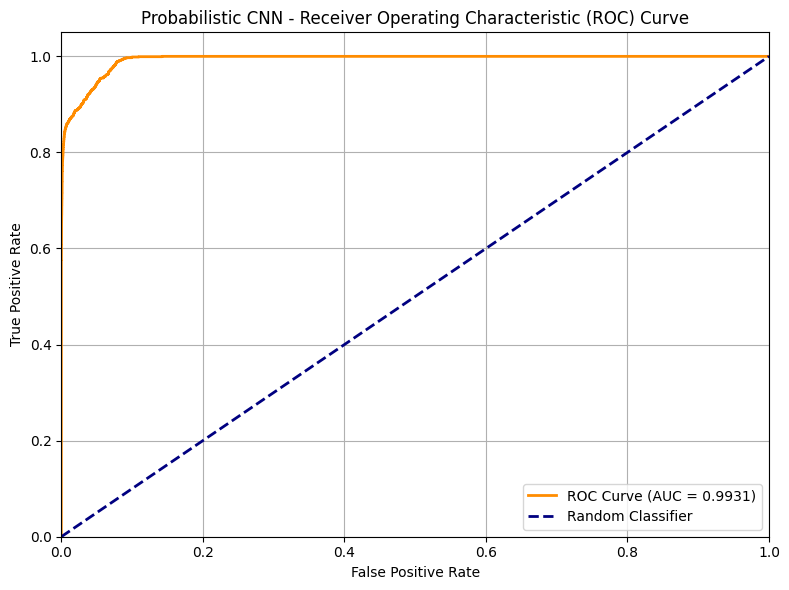

In [57]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_cnn)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Probabilistic CNN - Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


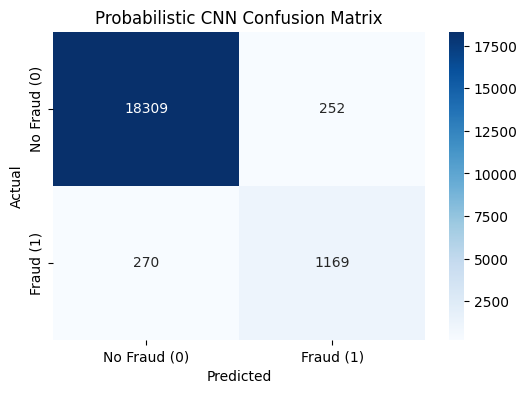

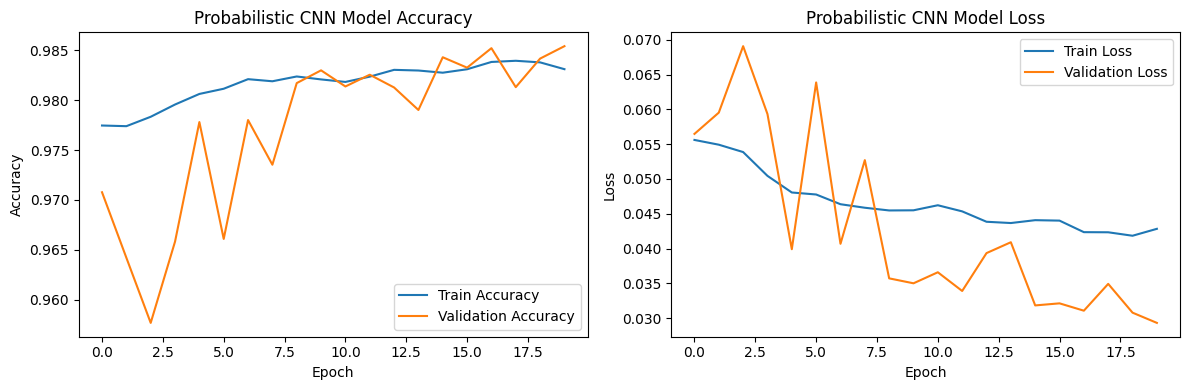

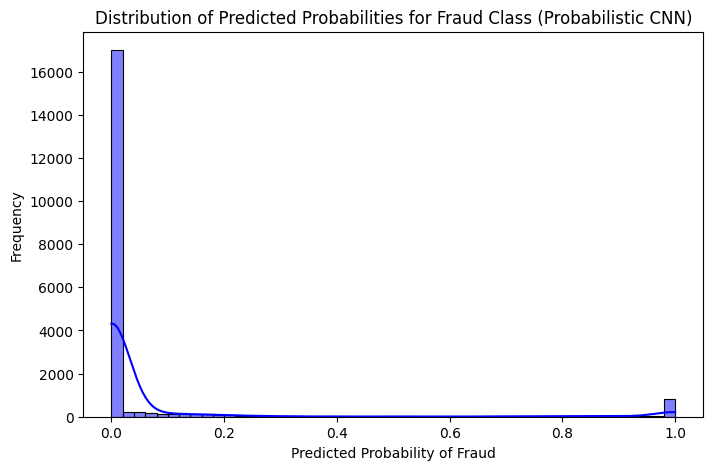

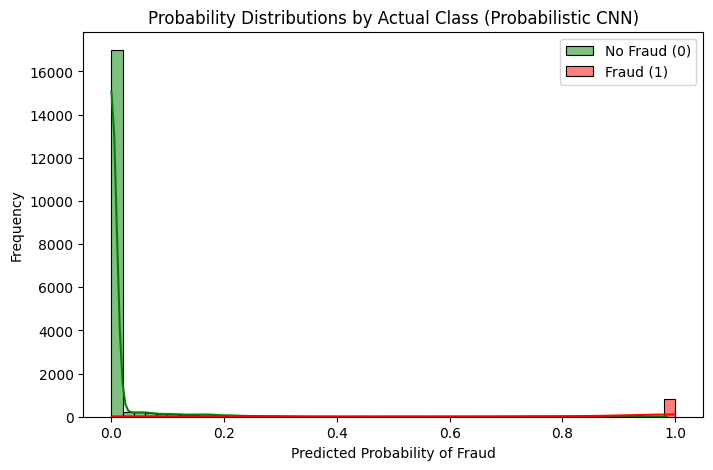

In [58]:
# Confusion matrix
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud (0)', 'Fraud (1)'],
            yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('Probabilistic CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_prob_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_prob_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Probabilistic CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_prob_cnn.history['loss'], label='Train Loss')
plt.plot(history_prob_cnn.history['val_loss'], label='Validation Loss')
plt.title('Probabilistic CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Probability distributions
fraud_probs_cnn = y_pred_proba_cnn  # Mean probabilities
fraud_probs_no_fraud_cnn = fraud_probs_cnn[y_test == 0]
fraud_probs_fraud_cnn = fraud_probs_cnn[y_test == 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_cnn, bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities for Fraud Class (Probabilistic CNN)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.show()

# Plot probability distributions by actual class
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_no_fraud_cnn, bins=50, kde=True, color='green', label='No Fraud (0)')
sns.histplot(fraud_probs_fraud_cnn, bins=50, kde=True, color='red', label='Fraud (1)')
plt.title('Probability Distributions by Actual Class (Probabilistic CNN)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.legend()
plt.show()



This prints summary statistics (mean and std) of predicted fraud probabilities for all transactions, and separately for fraud and no-fraud classes.
It estimates prediction uncertainty by sampling the Bernoulli distribution 100 times, calculating the mean and std deviation of predictions.
The code plots predicted probabilities with error bars showing uncertainty for 50 test samples.
Finally, it prints average uncertainty statistics specifically for fraud cases to assess confidence in those predictions.



Summary Statistics of Predicted Probabilities for Fraud Class (Probabilistic CNN):
All Transactions: Mean = 0.0707, Std = 0.2305
No Fraud (0): Mean = 0.0133, Std = 0.0624
Fraud (1): Mean = 0.8113, Std = 0.3116


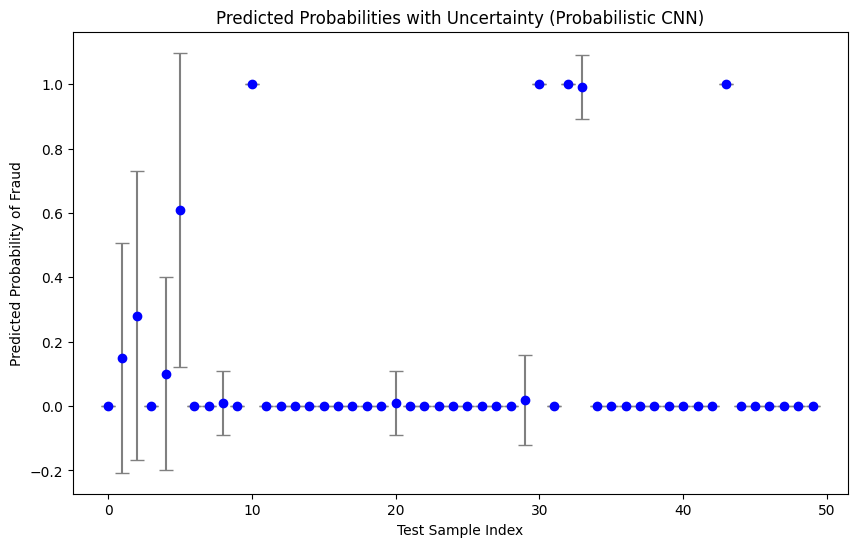


Uncertainty Statistics for Fraud Class (Probabilistic CNN):
Mean Uncertainty (Std Dev of Predictions): 0.1493
Std Dev of Uncertainty: 0.1814


In [59]:
# Print summary statistics of probabilities
print("\nSummary Statistics of Predicted Probabilities for Fraud Class (Probabilistic CNN):")
print(f"All Transactions: Mean = {np.mean(fraud_probs_cnn):.4f}, Std = {np.std(fraud_probs_cnn):.4f}")
print(f"No Fraud (0): Mean = {np.mean(fraud_probs_no_fraud_cnn):.4f}, Std = {np.std(fraud_probs_no_fraud_cnn):.4f}")
print(f"Fraud (1): Mean = {np.mean(fraud_probs_fraud_cnn):.4f}, Std = {np.std(fraud_probs_fraud_cnn):.4f}")

# Uncertainty Quantification: Sample multiple predictions to estimate uncertainty
n_samples = 100
y_pred_samples = np.array([tfd.Bernoulli(logits=logits).sample().numpy().flatten() for _ in range(n_samples)])
y_pred_mean = np.mean(y_pred_samples, axis=0)
y_pred_std = np.std(y_pred_samples, axis=0)

# Plot uncertainty for a subset of test samples
n_subset = 50
plt.figure(figsize=(10, 6))
plt.errorbar(range(n_subset), y_pred_mean[:n_subset], yerr=y_pred_std[:n_subset], fmt='o', color='blue', ecolor='gray', capsize=5)
plt.title('Predicted Probabilities with Uncertainty (Probabilistic CNN)')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Probability of Fraud')
plt.show()

# Print uncertainty statistics for Fraud class
fraud_indices = np.where(y_test == 1)[0]
print("\nUncertainty Statistics for Fraud Class (Probabilistic CNN):")
print(f"Mean Uncertainty (Std Dev of Predictions): {np.mean(y_pred_std[fraud_indices]):.4f}")
print(f"Std Dev of Uncertainty: {np.std(y_pred_std[fraud_indices]):.4f}")

#### LSTM

This code prepares resampled training and test data as dense arrays reshaped for LSTM input with shape (samples, timesteps, features).
It defines a FraudDetectionProbLSTMHyperModel class using Keras Tuner to build a probabilistic LSTM model with tunable hyperparameters.
The model starts with one LSTM layer, followed by optional additional LSTM layers, each with tunable units and dropout rates.
After LSTM layers, there’s a dense layer with tunable units and dropout to learn complex features.
The final output layer produces logits (no activation) for probabilistic binary classification using a Bernoulli distribution.
The model is compiled with an Adam optimizer and binary cross-entropy loss (from logits), tracking accuracy as a metric.

$$
Y \sim \text{Bernoulli} \Big( \sigma \big( W_{\text{out}} \cdot \text{LSTM}(X) + b_{\text{out}} \big) \Big)
$$


In [60]:
# Ensure TensorFlow Probability is compatible
tfd = tfp.distributions

# Convert processed data to dense arrays for LSTM
X_train_resampled_dense = X_train_resampled.toarray()
X_test_processed = preprocessor.transform(X_test)  # Transform test data
X_test_processed_dense = X_test_processed.toarray()  # Convert to dense array

# Reshape data for LSTM: (samples, timesteps, features)
n_features = X_train_resampled_dense.shape[1]
X_train_lstm = X_train_resampled_dense.reshape((X_train_resampled_dense.shape[0], n_features, 1))
X_test_lstm = X_test_processed_dense.reshape((X_test_processed_dense.shape[0], n_features, 1))
print(f"X_train_lstm shape: {X_train_lstm.shape}")
print(f"X_test_lstm shape: {X_test_lstm.shape}")

# Define Probabilistic LSTM HyperModel
class FraudDetectionProbLSTMHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        # First LSTM layer
        model.add(LSTM(
            units=hp.Int('units_1', min_value=32, max_value=128, step=32),
            input_shape=self.input_shape,
            return_sequences=True
        ))
        model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        
        # Additional LSTM layers (tunable)
        for i in range(hp.Int('num_lstm_layers', 1, 2)):
            model.add(LSTM(
                units=hp.Int(f'unAreas_{i+2}', min_value=16, max_value=64, step=16),
                return_sequences=False if i == hp.Int('num_lstm_layers', 1, 2) - 1 else True
            ))
            model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
        
        # Dense layer
        model.add(Dense(
            units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
            activation='relu'
        ))
        model.add(Dropout(hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)))
        
        # Output layer: Logits for Bernoulli distribution
        model.add(Dense(1))  # Output logits, no activation
        
        # Compile model
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy']
        )
        return model

X_train_lstm shape: (148488, 50, 1)
X_test_lstm shape: (20000, 50, 1)


This code defines a custom tuner `MyProbLSTMtuner` that includes batch size as a tunable hyperparameter during training trials.
It initializes the probabilistic LSTM hypermodel with the input shape and sets up the tuner to optimize validation accuracy over 3 trials, each executed twice.
The tuner performs a hyperparameter search on the LSTM training data for 10 epochs with a 20% validation split.
After tuning, it retrieves and prints the best model and its optimal hyperparameters.
Finally, it trains the best model using the selected batch size and validation split for 10 epochs.


In [61]:
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.layers.rnn.rnn')
# Custom tuner to include batch size
class MyProbLSTMtuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters
        kwargs['batch_size'] = hp.Int('batch_size', 32, 128, step=32)
        return super().run_trial(trial, *args, **kwargs)

# Initialize HyperModel and Tuner
input_shape = (n_features, 1)
hypermodel_prob_lstm = FraudDetectionProbLSTMHyperModel(input_shape=input_shape)
tuner_prob_lstm = MyProbLSTMtuner(
    hypermodel=hypermodel_prob_lstm,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory='tuner_dir_prob_lstm',
    project_name='fraud_detection_prob_lstm',
    overwrite=True
)

# Search for best hyperparameters
tuner_prob_lstm.search(
    X_train_lstm, y_train_resampled,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Get the best model and hyperparameters
best_prob_lstm_model = tuner_prob_lstm.get_best_models(num_models=1)[0]
best_prob_lstm_hyperparameters = tuner_prob_lstm.get_best_hyperparameters(num_trials=1)[0]

# Print best hyperparameters
print("\nBest Probabilistic LSTM Hyperparameters:")
for param, value in best_prob_lstm_hyperparameters.values.items():
    print(f"{param}: {value}")

# Train best model
history_prob_lstm = best_prob_lstm_model.fit(
    X_train_lstm, y_train_resampled,
    epochs=10,
    batch_size=best_prob_lstm_hyperparameters.get('batch_size'),
    validation_split=0.2,
    verbose=1
)

Trial 3 Complete [01h 55m 12s]
val_accuracy: 0.9454677104949951

Best val_accuracy So Far: 0.9843592047691345
Total elapsed time: 08h 46m 31s

Best Probabilistic LSTM Hyperparameters:
units_1: 64
dropout_1: 0.30000000000000004
num_lstm_layers: 2
unAreas_2: 48
dropout_2: 0.4
dense_units: 112
dense_dropout: 0.30000000000000004
learning_rate: 0.006419321606260593
batch_size: 32
unAreas_3: 16
dropout_3: 0.0
Epoch 1/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 228s 60ms/step - accuracy: 0.9762 - loss: 0.0592 - val_accuracy: 0.9769 - val_loss: 0.0342
Epoch 2/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 233s 63ms/step - accuracy: 0.9766 - loss: 0.0577 - val_accuracy: 0.9745 - val_loss: 0.0406
Epoch 3/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 242s 65ms/step - accuracy: 0.9760 - loss: 0.0575 - val_accuracy: 0.9691 - val_loss: 0.0451
Epoch 4/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 223s 60ms/step - accuracy: 0.9747 - loss: 0.0597 - val_accuracy: 0.9742 - val_loss: 0.0380
Epoch 5/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 208s 56ms/step - ac

This code uses the best probabilistic LSTM model to predict fraud probabilities and binary labels on the test set. It calculates key classification metrics—accuracy, precision, recall, F1 score, and ROC AUC—based on these predictions. The performance results are printed along with a detailed classification report. It then computes and visualizes the confusion matrix using a heatmap to show prediction accuracy across classes. Finally, it displays the confusion matrix plot for visual evaluation of model performance.


625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step

Probabilistic LSTM Performance:
Accuracy: 0.9687
Precision: 0.7465
Recall: 0.8555
F1 Score: 0.7973
ROC AUC Score: 0.9932

Probabilistic LSTM Classification Report:
              precision    recall  f1-score   support

No Fraud (0)       0.99      0.98      0.98     18561
   Fraud (1)       0.75      0.86      0.80      1439

    accuracy                           0.97     20000
   macro avg       0.87      0.92      0.89     20000
weighted avg       0.97      0.97      0.97     20000



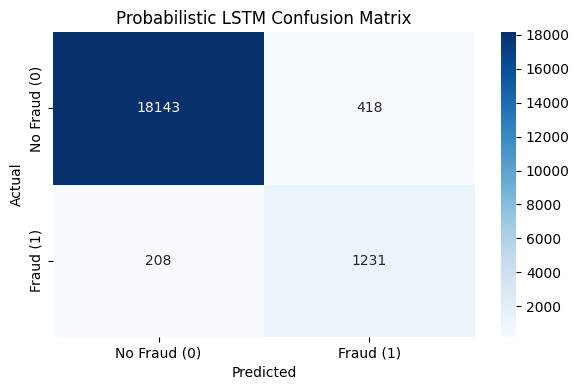

In [62]:
# Predict and evaluate
logits = best_prob_lstm_model.predict(X_test_lstm)
y_pred_proba_lstm = tf.sigmoid(logits).numpy().flatten()
y_pred_dist = tfd.Bernoulli(logits=logits)
y_pred_lstm = y_pred_dist.sample().numpy().flatten()

# Calculate performance metrics
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm, pos_label=1)
recall_lstm = recall_score(y_test, y_pred_lstm, pos_label=1)
f1_lstm = f1_score(y_test, y_pred_lstm, pos_label=1)
auc_score_lstm = roc_auc_score(y_test, y_pred_proba_lstm)

# Print results
print("\nProbabilistic LSTM Performance:")
print(f"Accuracy: {accuracy_lstm:.4f}")
print(f"Precision: {precision_lstm:.4f}")
print(f"Recall: {recall_lstm:.4f}")
print(f"F1 Score: {f1_lstm:.4f}")
print(f"ROC AUC Score: {auc_score_lstm:.4f}")

# Classification report
print("\nProbabilistic LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=['No Fraud (0)', 'Fraud (1)']))

# Confusion matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud (0)', 'Fraud (1)'],
            yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('Probabilistic LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

This code plots the training history of the probabilistic LSTM, showing how accuracy and loss changed over epochs for both training and validation data. Then, it plots the ROC curve comparing the model’s true positive rate against the false positive rate and includes the AUC score for performance evaluation. The diagonal dashed line represents a random classifier for baseline comparison.


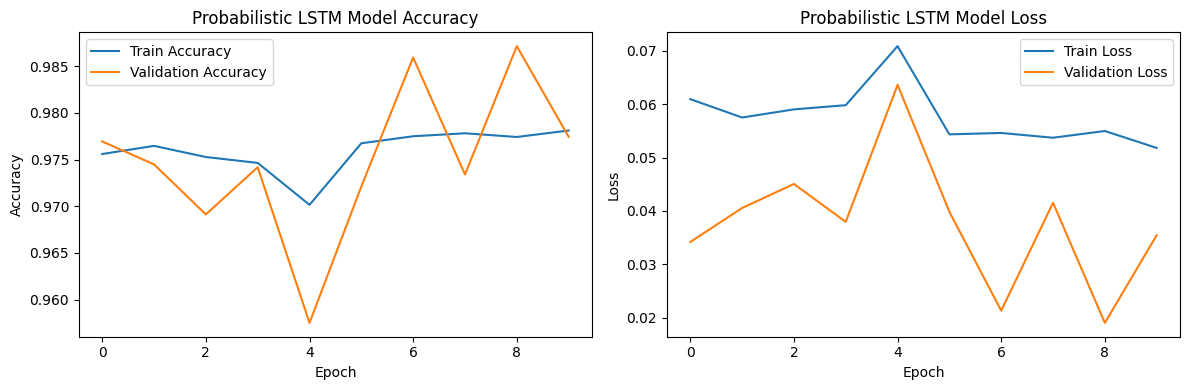

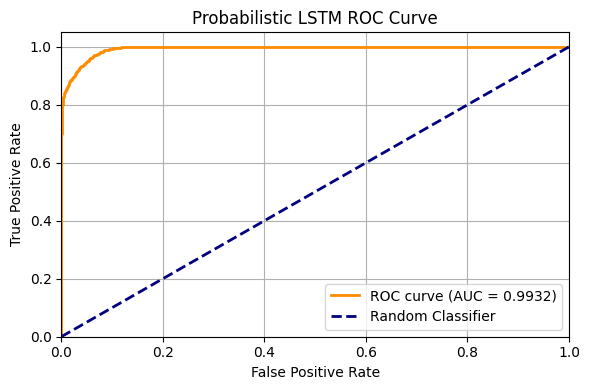

In [63]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_prob_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_prob_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Probabilistic LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_prob_lstm.history['loss'], label='Train Loss')
plt.plot(history_prob_lstm.history['val_loss'], label='Validation Loss')
plt.title('Probabilistic LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lstm)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_lstm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Probabilistic LSTM ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

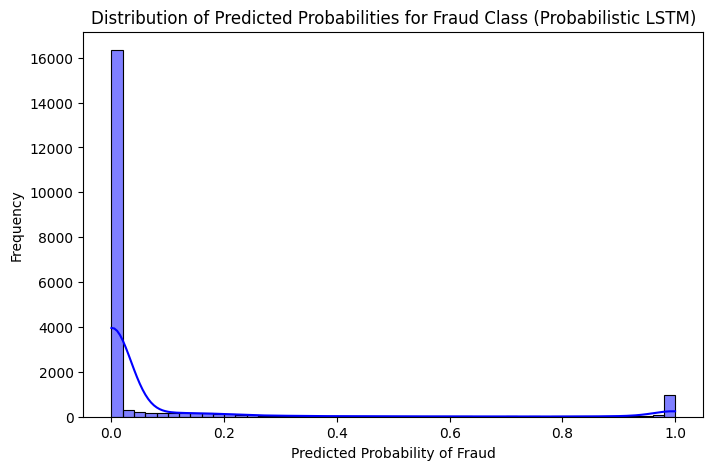

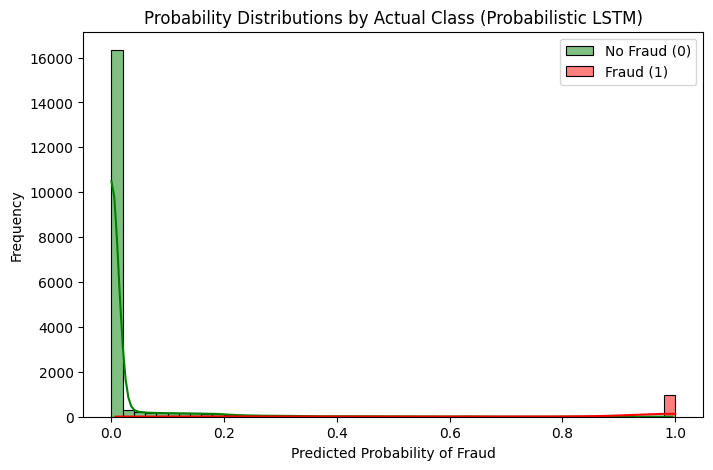


Summary Statistics of Predicted Probabilities for Fraud Class (Probabilistic LSTM):
All Transactions: Mean = 0.0827, Std = 0.2429
No Fraud (0): Mean = 0.0228, Std = 0.0874
Fraud (1): Mean = 0.8549, Std = 0.2815


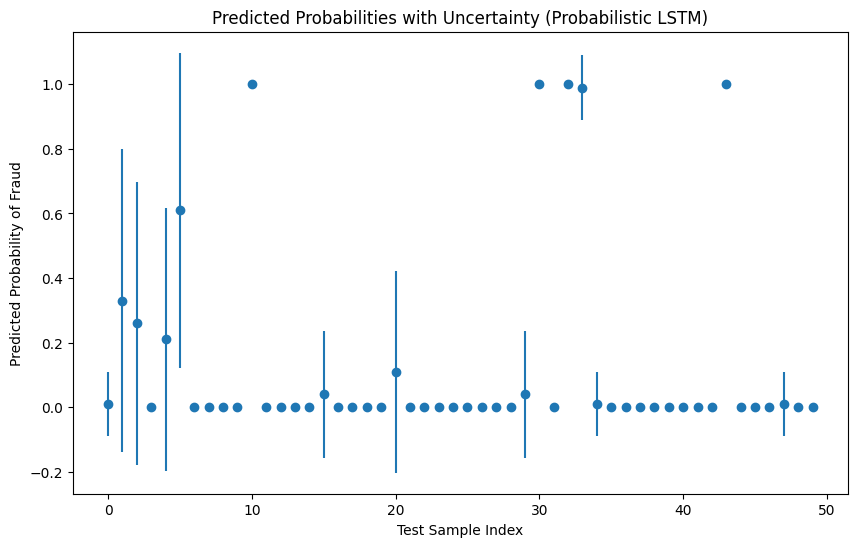


Uncertainty Statistics for Fraud Class (Probabilistic LSTM):
Mean Uncertainty (Std Dev of Predictions): 0.1223
Std Dev of Uncertainty: 0.1706


In [64]:
# Probability distributions
fraud_probs_lstm = y_pred_proba_lstm
fraud_probs_no_fraud_lstm = fraud_probs_lstm[y_test == 0]
fraud_probs_fraud_lstm = fraud_probs_lstm[y_test == 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_lstm, bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities for Fraud Class (Probabilistic LSTM)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.show()

# Plot probability distributions by actual class
plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_no_fraud_lstm, bins=50, kde=True, color='green', label='No Fraud (0)')
sns.histplot(fraud_probs_fraud_lstm, bins=50, kde=True, color='red', label='Fraud (1)')
plt.title('Probability Distributions by Actual Class (Probabilistic LSTM)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print summary statistics of probabilities
print("\nSummary Statistics of Predicted Probabilities for Fraud Class (Probabilistic LSTM):")
print(f"All Transactions: Mean = {np.mean(fraud_probs_lstm):.4f}, Std = {np.std(fraud_probs_lstm):.4f}")
print(f"No Fraud (0): Mean = {np.mean(fraud_probs_no_fraud_lstm):.4f}, Std = {np.std(fraud_probs_no_fraud_lstm):.4f}")
print(f"Fraud (1): Mean = {np.mean(fraud_probs_fraud_lstm):.4f}, Std = {np.std(fraud_probs_fraud_lstm):.4f}")

# Uncertainty Quantification
n_samples = 100
y_pred_samples = np.array([tfd.Bernoulli(logits=logits).sample().numpy().flatten() for _ in range(n_samples)])
y_pred_mean = np.mean(y_pred_samples, axis=0)
y_pred_std = np.std(y_pred_samples, axis=0)

# Plot uncertainty for a subset of test samples
n_subset = 50
plt.figure(figsize=(10, 6))
plt.errorbar(range(n_subset), y_pred_mean[:n_subset], yerr=y_pred_std[:n_subset], fmt='o')
plt.title('Predicted Probabilities with Uncertainty (Probabilistic LSTM)')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Probability of Fraud')
plt.show()

# Print uncertainty statistics for Fraud class
fraud_indices = np.where(y_test == 1)[0]
print("\nUncertainty Statistics for Fraud Class (Probabilistic LSTM):")
print(f"Mean Uncertainty (Std Dev of Predictions): {np.mean(y_pred_std[fraud_indices]):.4f}")
print(f"Std Dev of Uncertainty: {np.std(y_pred_std[fraud_indices]):.4f}")

#### GRU

This block first converts your sparse training and test feature matrices to dense arrays if needed, then reshapes them for GRU input as `(samples, timesteps, features)`. It defines a custom `FraudDetectionProbGRUHyperModel` class using Keras Tuner’s `HyperModel`. Inside, the `build` method creates a GRU-based sequential model where the number of units, layers, dropout rates, and dense units are all tunable hyperparameters. The GRU layers can stack depending on `num_gru_layers`, with the last GRU not returning sequences. The final output layer produces logits for binary classification. The model uses the Adam optimizer with a tunable learning rate and binary cross-entropy loss with logits (Reference -3).


$$
Y \sim \text{Bernoulli}\!\big( \sigma(W_{\text{out}} \cdot \text{GRU}(X) + b_{\text{out}}) \big)
$$


In [65]:
# Convert sparse matrices to dense arrays
X_train_resampled_dense = X_train_resampled.toarray() if hasattr(X_train_resampled, 'toarray') else X_train_resampled
X_test_processed = preprocessor.transform(X_test)
X_test_processed_dense = X_test_processed.toarray() if hasattr(X_test_processed, 'toarray') else X_test_processed

n_features = X_train_resampled_dense.shape[1]
X_train_gru = X_train_resampled_dense.reshape((X_train_resampled_dense.shape[0], n_features, 1))
X_test_gru = X_test_processed_dense.reshape((X_test_processed_dense.shape[0], n_features, 1))

print(f"X_train_gru shape: {X_train_gru.shape}")
print(f"X_test_gru shape: {X_test_gru.shape}")

class FraudDetectionProbGRUHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        # First GRU layer
        model.add(GRU(
            units=hp.Int('units_1', min_value=32, max_value=128, step=32),
            input_shape=self.input_shape,
            return_sequences=True
        ))
        model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
        
        for i in range(hp.Int('num_gru_layers', 1, 2)):
            model.add(GRU(
                units=hp.Int(f'units_{i+2}', min_value=16, max_value=64, step=16),
                return_sequences=False if i == hp.Int('num_gru_layers', 1, 2) - 1 else True
            ))
            model.add(Dropout(hp.Float(f'dropout_{i+2}', min_value=0.0, max_value=0.5, step=0.1)))
        
        model.add(Dense(
            units=hp.Int('dense_units', min_value=16, max_value=128, step=16),
            activation='relu'
        ))
        model.add(Dropout(hp.Float('dense_dropout', min_value=0.0, max_value=0.5, step=0.1)))

        model.add(Dense(1))  
        
        model.compile(
            optimizer=tf.keras.optimizers.Adam(
                hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
            ),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy']
        )
        return model

X_train_gru shape: (148488, 50, 1)
X_test_gru shape: (20000, 50, 1)


This code defines a custom tuner `MyProbGRUtuner` extending `RandomSearch` to include tunable batch size during hyperparameter tuning. It sets up the `FraudDetectionProbGRUHyperModel` with the reshaped GRU input shape. The tuner searches for the best GRU model configuration by trying different combinations of GRU units, layers, dropout rates, dense units, learning rate, and batch size — optimizing for validation accuracy. It runs each trial twice (`executions_per_trial=2`) for more reliable results. After tuning, it retrieves the best GRU model and its hyperparameters. Finally, it trains this best GRU model again using the discovered optimal batch size and other settings for 10 epochs with a validation split to monitor performance.


In [66]:
class MyProbGRUtuner(RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        hp = trial.hyperparameters
        kwargs['batch_size'] = hp.Int('batch_size', 32, 128, step=32)
        return super().run_trial(trial, *args, **kwargs)

input_shape = (n_features, 1)
hypermodel_prob_gru = FraudDetectionProbGRUHyperModel(input_shape=input_shape)
tuner_prob_gru = MyProbGRUtuner(
    hypermodel=hypermodel_prob_gru,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=2,
    directory='tuner_dir_prob_gru',
    project_name='fraud_detection_prob_gru',
    overwrite=True
)

tuner_prob_gru.search(
    X_train_gru, y_train_resampled,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

best_prob_gru_model = tuner_prob_gru.get_best_models(num_models=1)[0]
best_prob_gru_hyperparameters = tuner_prob_gru.get_best_hyperparameters(num_trials=1)[0]

print("\nBest Probabilistic GRU Hyperparameters:")
for param, value in best_prob_gru_hyperparameters.values.items():
    print(f"{param}: {value}")

history_prob_gru = best_prob_gru_model.fit(
    X_train_gru, y_train_resampled,
    epochs=10,
    batch_size=best_prob_gru_hyperparameters.get('batch_size'),
    validation_split=0.2,
    verbose=1
)

Trial 3 Complete [00h 39m 43s]
val_accuracy: 0.9341369569301605

Best val_accuracy So Far: 0.9352986812591553
Total elapsed time: 02h 15m 17s

Best Probabilistic GRU Hyperparameters:
units_1: 32
dropout_1: 0.0
num_gru_layers: 1
units_2: 16
dropout_2: 0.1
dense_units: 112
dense_dropout: 0.30000000000000004
learning_rate: 0.0003588613453833401
batch_size: 32
Epoch 1/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 137s 36ms/step - accuracy: 0.9688 - loss: 0.0743 - val_accuracy: 0.9816 - val_loss: 0.0291
Epoch 2/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 127s 34ms/step - accuracy: 0.9703 - loss: 0.0714 - val_accuracy: 0.9864 - val_loss: 0.0209
Epoch 3/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 133s 36ms/step - accuracy: 0.9714 - loss: 0.0685 - val_accuracy: 0.9831 - val_loss: 0.0262
Epoch 4/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 148s 40ms/step - accuracy: 0.9717 - loss: 0.0674 - val_accuracy: 0.9839 - val_loss: 0.0241
Epoch 5/10
3713/3713 ━━━━━━━━━━━━━━━━━━━━ 146s 39ms/step - accuracy: 0.9729 - loss: 0.0642 - val_accuracy: 0.

This block predicts fraud on the test data using the trained Probabilistic GRU model by sampling from a Bernoulli distribution of logits. It calculates performance metrics — accuracy, precision, recall, F1 score, and ROC AUC — to evaluate how well the model distinguishes fraud from non-fraud. It prints a detailed classification report to show metrics for each class. Finally, it visualizes prediction results with a confusion matrix heatmap to clearly show true vs. false predictions for both fraud and non-fraud cases.


625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step

Probabilistic GRU Performance:
Accuracy: 0.9594
Precision: 0.6599
Recall: 0.8992
F1 Score: 0.7612

ROC AUC Score (Probabilistic GRU): 0.9932

Probabilistic GRU Classification Report:
              precision    recall  f1-score   support

No Fraud (0)       0.99      0.96      0.98     18561
   Fraud (1)       0.66      0.90      0.76      1439

    accuracy                           0.96     20000
   macro avg       0.83      0.93      0.87     20000
weighted avg       0.97      0.96      0.96     20000



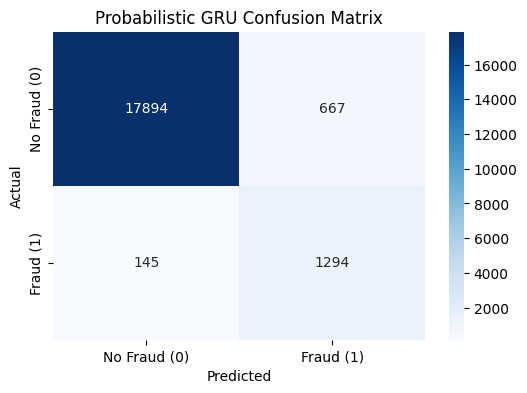

In [107]:
# Predict and evaluate
logits = best_prob_gru_model.predict(X_test_gru)
y_pred_proba_gru = tf.sigmoid(logits).numpy().flatten()
y_pred_dist = tfd.Bernoulli(logits=logits)
y_pred_gru = y_pred_dist.sample().numpy().flatten()

accuracy_gru = accuracy_score(y_test, y_pred_gru)
precision_gru = precision_score(y_test, y_pred_gru, pos_label=1)
recall_gru = recall_score(y_test, y_pred_gru, pos_label=1)
f1_gru = f1_score(y_test, y_pred_gru, pos_label=1)
roc_auc_gru = roc_auc_score(y_test, y_pred_proba_gru)

print("\nProbabilistic GRU Performance:")
print(f"Accuracy: {accuracy_gru:.4f}")
print(f"Precision: {precision_gru:.4f}")
print(f"Recall: {recall_gru:.4f}")
print(f"F1 Score: {f1_gru:.4f}")
print(f"\nROC AUC Score (Probabilistic GRU): {roc_auc_gru:.4f}")

print("\nProbabilistic GRU Classification Report:")
print(classification_report(y_test, y_pred_gru, target_names=['No Fraud (0)', 'Fraud (1)']))

cm_gru = confusion_matrix(y_test, y_pred_gru)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Fraud (0)', 'Fraud (1)'],
            yticklabels=['No Fraud (0)', 'Fraud (1)'])
plt.title('Probabilistic GRU Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This code plots the ROC curve for the Probabilistic GRU by comparing true positive and false positive rates at various thresholds. It includes the model’s AUC score in the legend to show overall discrimination performance. The diagonal dashed line represents random guessing for comparison.


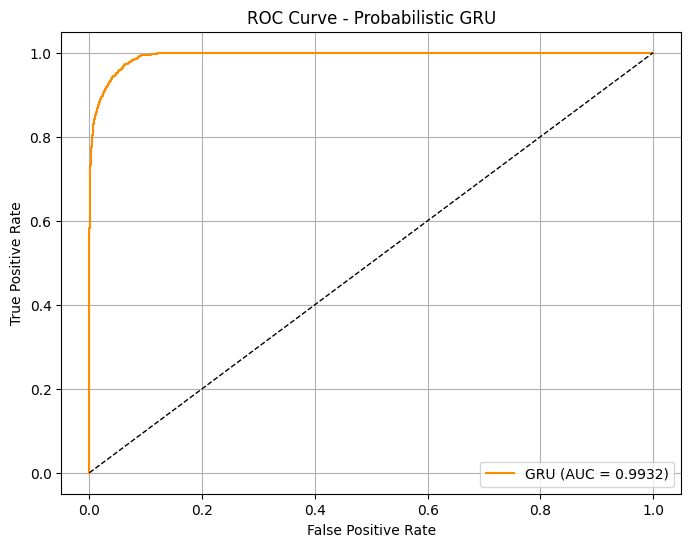

In [108]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_gru)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GRU (AUC = {roc_auc_gru:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Probabilistic GRU')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

The below code first plots training vs. validation accuracy and loss to show how the Probabilistic GRU learned over epochs. Then, it visualizes the distribution of all predicted fraud probabilities to assess output uncertainty. Finally, it plots separate probability distributions for actual fraud and non-fraud classes, revealing how well the model separates them.


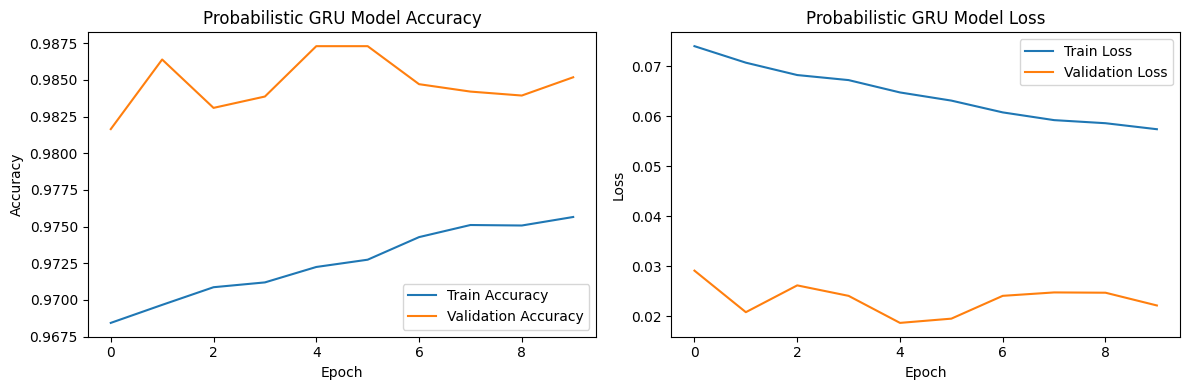

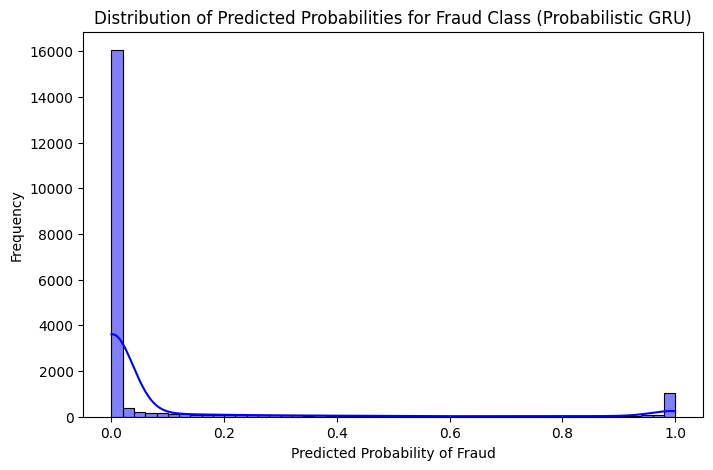

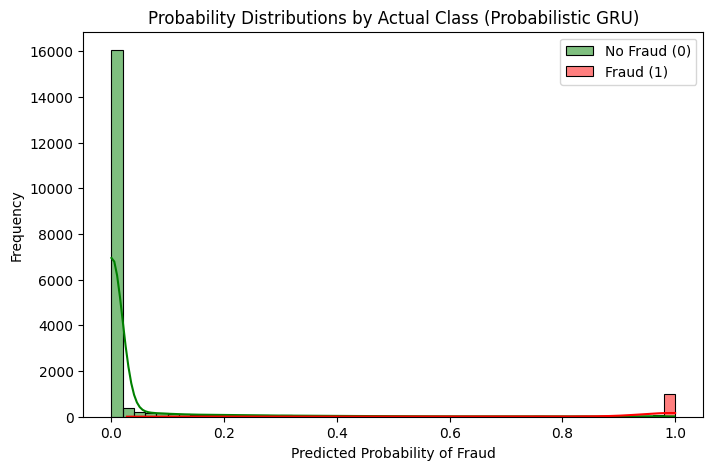

In [109]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_prob_gru.history['accuracy'], label='Train Accuracy')
plt.plot(history_prob_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('Probabilistic GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_prob_gru.history['loss'], label='Train Loss')
plt.plot(history_prob_gru.history['val_loss'], label='Validation Loss')
plt.title('Probabilistic GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

fraud_probs_gru = y_pred_proba_gru
fraud_probs_no_fraud_gru = fraud_probs_gru[y_test == 0]
fraud_probs_fraud_gru = fraud_probs_gru[y_test == 1]

plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_gru, bins=50, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities for Fraud Class (Probabilistic GRU)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(fraud_probs_no_fraud_gru, bins=50, kde=True, color='green', label='No Fraud (0)')
sns.histplot(fraud_probs_fraud_gru, bins=50, kde=True, color='red', label='Fraud (1)')
plt.title('Probability Distributions by Actual Class (Probabilistic GRU)')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The below block first prints the mean and standard deviation of the predicted fraud probabilities overall, and split by true class (fraud vs. no fraud). It then generates multiple samples from the Bernoulli posterior to estimate uncertainty and plots mean predicted probabilities with error bars showing standard deviation for a subset of test samples. Finally, it prints summary statistics of the prediction uncertainty specifically for the true fraud cases.



Summary Statistics of Predicted Probabilities for Fraud Class (Probabilistic GRU):
All Transactions: Mean = 0.0986, Std = 0.2629
No Fraud (0): Mean = 0.0367, Std = 0.1314
Fraud (1): Mean = 0.8968, Std = 0.2265


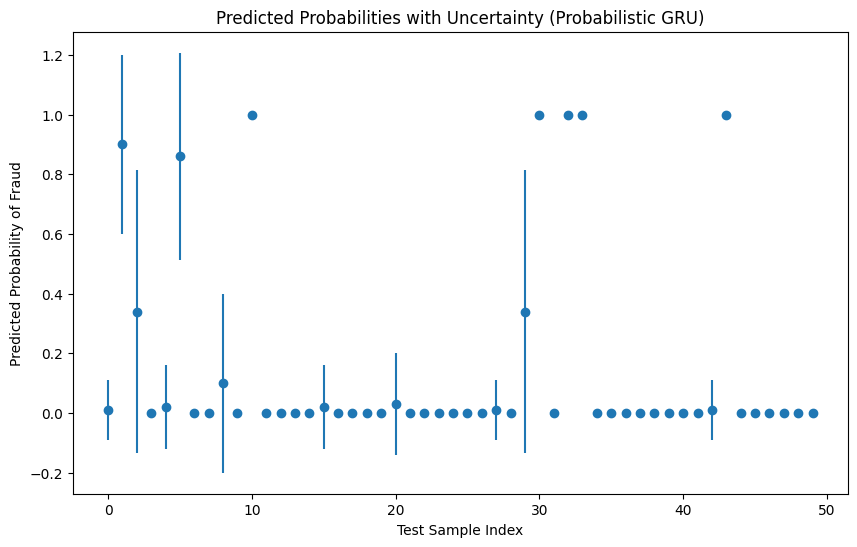


Uncertainty Statistics for Fraud Class (Probabilistic GRU):
Mean Uncertainty (Std Dev of Predictions): 0.1114
Std Dev of Uncertainty: 0.1690


In [110]:
# Print summary statistics of probabilities
print("\nSummary Statistics of Predicted Probabilities for Fraud Class (Probabilistic GRU):")
print(f"All Transactions: Mean = {np.mean(fraud_probs_gru):.4f}, Std = {np.std(fraud_probs_gru):.4f}")
print(f"No Fraud (0): Mean = {np.mean(fraud_probs_no_fraud_gru):.4f}, Std = {np.std(fraud_probs_no_fraud_gru):.4f}")
print(f"Fraud (1): Mean = {np.mean(fraud_probs_fraud_gru):.4f}, Std = {np.std(fraud_probs_fraud_gru):.4f}")

n_samples = 100
y_pred_samples = np.array([tfd.Bernoulli(logits=logits).sample().numpy().flatten() for _ in range(n_samples)])
y_pred_mean = np.mean(y_pred_samples, axis=0)
y_pred_std = np.std(y_pred_samples, axis=0)

n_subset = 50
plt.figure(figsize=(10, 6))
plt.errorbar(range(n_subset), y_pred_mean[:n_subset], yerr=y_pred_std[:n_subset], fmt='o')
plt.title('Predicted Probabilities with Uncertainty (Probabilistic GRU)')
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Probability of Fraud')
plt.show()

# Print uncertainty statistics for Fraud class
fraud_indices = np.where(y_test == 1)[0]
print("\nUncertainty Statistics for Fraud Class (Probabilistic GRU):")
print(f"Mean Uncertainty (Std Dev of Predictions): {np.mean(y_pred_std[fraud_indices]):.4f}")
print(f"Std Dev of Uncertainty: {np.std(y_pred_std[fraud_indices]):.4f}")

#### Performace comparisions 

In this block, you first define a dictionary called `metrics` that stores the names of all your models and their key performance metrics — accuracy, precision, recall, F1-score, and ROC AUC — using the previously calculated values for each model (Logistic Regression, Decision Tree, Random Forest, XGBoost, Neural Network, CNN, LSTM, GRU). Then, you create a `pandas` DataFrame from this dictionary, which organizes the metrics in a table format for easy comparison. Finally, you print the DataFrame, rounding the numbers to four decimal places for clearer presentation (Reference -2).

---

## ✅ **Accuracy**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Credit card fraud detection:**

$$
\text{Accuracy} = \frac{\text{Number of correctly approved legitimate transactions} + \text{Number of correctly blocked frauds}}{\text{Total transactions checked}}
$$

---

## ✅ **Precision**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

**Credit card fraud detection:**

$$
\text{Precision} = \frac{\text{Number of correctly blocked frauds}}{\text{Number of transactions flagged as fraud (both correct and incorrect)}}
$$

---

## ✅ **Recall**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

**Credit card fraud detection:**

$$
\text{Recall} = \frac{\text{Number of correctly blocked frauds}}{\text{Total number of actual frauds}}
$$

---

## ✅ **F1-Score**

$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

**Credit card fraud detection:**

$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

## ✅ **ROC AUC**

$$
\text{ROC AUC} = \text{Area under the Receiver Operating Characteristic Curve}
$$

**Credit card fraud detection:**

$$
\text{ROC AUC} = \text{Measures how well the model distinguishes frauds from legitimate transactions across all thresholds.}
$$

---



In [111]:
# Define performance metrics dictionary
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network', 'CNN', 'LSTM', 'GRU'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_nn, accuracy_cnn, accuracy_lstm, accuracy_gru],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_xgb, precision_nn, precision_cnn, precision_lstm, precision_gru],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_xgb, recall_nn, recall_cnn, recall_lstm, recall_gru],
    'F1-Score': [f1_lr, f1_dt, f1_rf, f1_xgb, f1_nn, f1_cnn, f1_lstm, f1_gru],
    'ROC AUC': [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_nn, roc_auc_cnn, auc_score_lstm, roc_auc_gru]
}

# Create DataFrame and display
df = pd.DataFrame(metrics)
print("\nModel Performance Comparison:\n", df.round(4))


Model Performance Comparison:
                  Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  Logistic Regression    0.9402     0.5489  0.9444    0.6943   0.9829
1        Decision Tree    0.9748     0.8042  0.8589    0.8306   0.9214
2        Random Forest    0.9842     0.9187  0.8555    0.8859   0.9934
3              XGBoost    0.9852     0.9340  0.8555    0.8930   0.9939
4       Neural Network    0.9748     0.7892  0.8874    0.8355   0.9925
5                  CNN    0.9739     0.8227  0.8124    0.8175   0.9931
6                 LSTM    0.9687     0.7465  0.8555    0.7973   0.9932
7                  GRU    0.9594     0.6599  0.8992    0.7612   0.9932


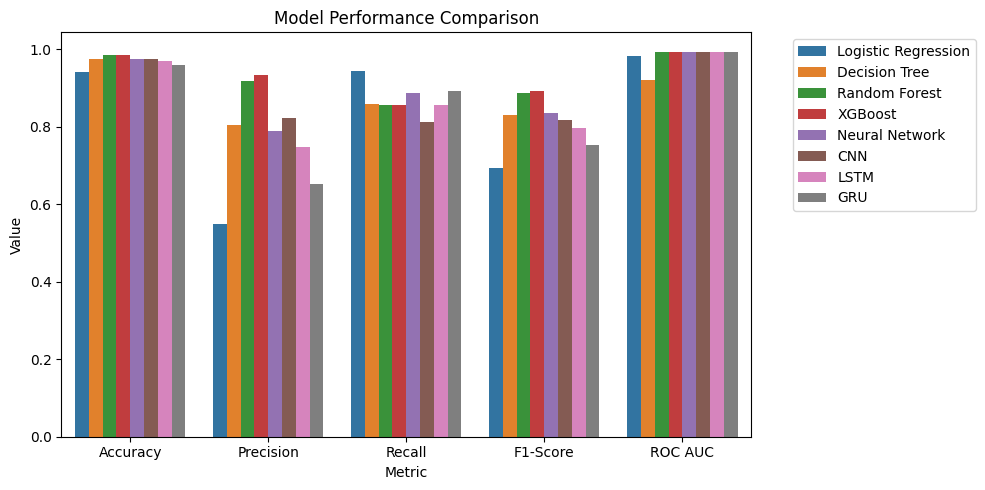

In [73]:
# Bar plot for metrics
melted = df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'], var_name='Metric', value_name='Value')
plt.figure(figsize=(10, 5))
sns.barplot(data=melted, x='Metric', y='Value', hue='Model')
plt.title('Model Performance Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In this block, you first define a dictionary `metrics` to collect and compare the mean and standard deviation of the predicted fraud probabilities for each model, split into *all transactions*, *non-fraud cases*, and *fraud cases*. You then create a `pandas` DataFrame `df_prob_stats` from this dictionary and round its numeric values to four decimal places for clarity. After printing the nicely formatted table, you reshape (melt) the DataFrame into a long format for easier plotting. Finally, you create a grouped bar plot using Seaborn to visually compare how each model’s predicted probability distributions behave across different classes and metrics.


In [105]:
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'Neural Network', 'CNN', 'LSTM', 'GRU'],
    'All Transactions Mean': [np.mean(fraud_probs_lr), np.mean(fraud_probs_dt), np.mean(fraud_probs), np.mean(fraud_probs_xgb), np.mean(fraud_probs_nn), np.mean(fraud_probs_cnn), np.mean(fraud_probs_lstm), np.mean(fraud_probs_gru)],
    'All Transactions Std': [np.std(fraud_probs_lr), np.std(fraud_probs_dt), np.std(fraud_probs), np.std(fraud_probs_xgb), np.std(fraud_probs_nn), np.std(fraud_probs_cnn), np.std(fraud_probs_lstm), np.std(fraud_probs_gru)],
    'No Fraud (0) Mean': [np.mean(fraud_probs_no_fraud_lr), np.mean(fraud_probs_no_fraud_dt), np.mean(fraud_probs_no_fraud), np.mean(fraud_probs_no_fraud_xgb), np.mean(fraud_probs_no_fraud_nn), np.mean(fraud_probs_no_fraud_cnn), np.mean(fraud_probs_no_fraud_lstm), np.mean(fraud_probs_no_fraud_gru)],
    'No Fraud (0) Std': [np.std(fraud_probs_no_fraud_lr), np.std(fraud_probs_no_fraud_dt), np.std(fraud_probs_no_fraud), np.std(fraud_probs_no_fraud_xgb), np.std(fraud_probs_no_fraud_nn), np.std(fraud_probs_no_fraud_cnn), np.std(fraud_probs_no_fraud_lstm), np.std(fraud_probs_no_fraud_gru)],
    'Fraud (1) Mean': [np.mean(fraud_probs_fraud_lr), np.mean(fraud_probs_fraud_dt), np.mean(fraud_probs_fraud), np.mean(fraud_probs_fraud_xgb), np.mean(fraud_probs_fraud_nn), np.mean(fraud_probs_fraud_cnn), np.mean(fraud_probs_fraud_lstm), np.mean(fraud_probs_fraud_gru)],
    'Fraud (1) Std': [np.std(fraud_probs_fraud_lr), np.std(fraud_probs_fraud_dt), np.std(fraud_probs_fraud), np.std(fraud_probs_fraud_xgb), np.std(fraud_probs_fraud_nn), np.std(fraud_probs_fraud_cnn), np.std(fraud_probs_fraud_lstm), np.std(fraud_probs_fraud_gru)]
}


Probabilistic Distribution Statistics Comparison:

              Model  All Transactions Mean  All Transactions Std  No Fraud (0) Mean  No Fraud (0) Std  Fraud (1) Mean  Fraud (1) Std
Logistic Regression                 0.1427                0.2869             0.0837            0.1935          0.9026         0.1956
      Decision Tree                 0.0768                0.2664             0.0162            0.1263          0.8589         0.3481
      Random Forest                 0.0794                0.2309             0.0221            0.0796          0.8188         0.2656
            XGBoost                 0.0725                0.2316             0.0143            0.0585          0.8240         0.3050
     Neural Network                 0.0847                0.2538             0.0236            0.1082          0.8726         0.2742
                CNN                 0.0707                0.2305             0.0133            0.0624          0.8113         0.3116
               LS

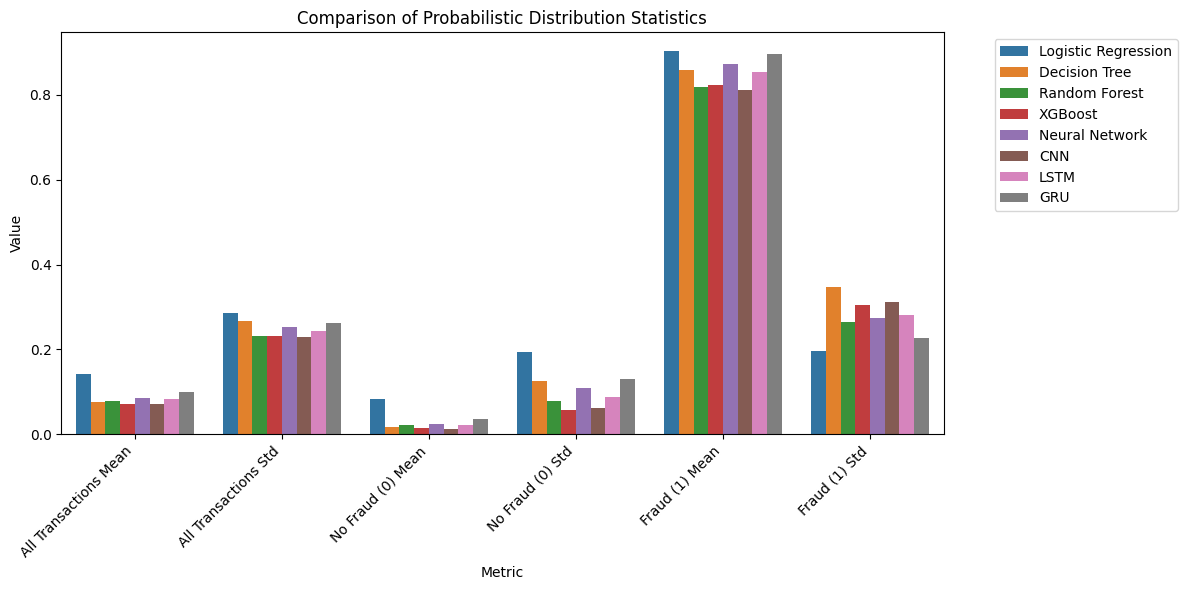

In [106]:

# Create DataFrame
df_prob_stats = pd.DataFrame(metrics)

# Round numerical values to 4 decimal places
df_prob_stats = df_prob_stats.round(4)

# Display the comparison table
print("\nProbabilistic Distribution Statistics Comparison:\n")
print(df_prob_stats.to_string(index=False))

# Melt the DataFrame for plotting
melted = df_prob_stats.melt(id_vars='Model', 
                            value_vars=['All Transactions Mean', 'All Transactions Std', 
                                        'No Fraud (0) Mean', 'No Fraud (0) Std', 
                                        'Fraud (1) Mean', 'Fraud (1) Std'],
                            var_name='Metric', value_name='Value')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Metric', y='Value', hue='Model')
plt.title('Comparison of Probabilistic Distribution Statistics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Retraining the Best XGBoost Model with Preprocessing and Stratified Cross-Validation"

First, the categorical columns requiring one-hot encoding are defined, followed by setting up a ColumnTransformer to encode these categorical features while passing numerical features unchanged. A Pipeline is constructed to chain this preprocessing step with the XGBoost classifier. A simplified hyperparameter grid is specified to tune key parameters (n_estimators, max_depth, scale_pos_weight) in order to address class imbalance and reduce training time. GridSearchCV with Stratified K-Fold cross-validation is then executed, optimizing for the F1-score to identify the best hyperparameters. The pipeline is rebuilt and refitted on the training data using these optimal parameters. Finally, predictions for both class labels and fraud probabilities are generated on the test set using the optimized model. This approach ensures that the final XGBoost model employs the best-found settings with proper preprocessing of categorical variables.

In [94]:
# Define categorical columns (from previous error)
categorical_columns = [
    'Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 
    'Merchant Group', 'Country of Transaction', 'Shipping Address', 
    'Country of Residence', 'Gender', 'Bank'
]

# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'  # Keep numerical columns unchanged
)

# Simplified hyperparameter grid for faster training
param_grid = {
    'xgb__n_estimators': [100, 200],        # Fewer trees
    'xgb__max_depth': [3, 5],               # Shallower trees
    'xgb__learning_rate': [0.1],            # Fixed learning rate
    'xgb__scale_pos_weight': [1, 13.9]      # Class imbalance (13.9 ≈ (1-0.07195)/0.07195)
}

# Initialize XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb)
])

# Set up Stratified K-Fold Cross-Validation (k=3)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kfold,
    scoring='f1',  # Optimize for F1-score
    n_jobs=-1,
    verbose=1
)

# Fit Grid Search on training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest Parameters:", grid_search.best_params_)

# Retrain model with best parameters
best_params = {key.replace('xgb__', ''): value for key, value in grid_search.best_params_.items()}
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42))
])
best_pipeline.fit(X_train, y_train)

# Predict probabilities and labels on test set
fraud_probs_xgb = best_pipeline.predict_proba(X_test)[:, 1]
y_pred_xgb = best_pipeline.predict(X_test)


Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Parameters: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1}


This code predicts fraud probabilities and class labels on the test set using the optimized XGBoost model. It then calculates summary statistics (mean and standard deviation) of predicted probabilities for all transactions, as well as separately for non-fraud and fraud classes. Next, key performance metrics—accuracy, precision, recall, F1-score, and ROC AUC—are computed and printed along with a detailed classification report. Finally, these performance metrics are visualized in a bar chart to provide a clear comparison of the model’s effectiveness.

In [95]:
# Predict probabilities and labels on test set
fraud_probs_xgb = best_pipeline.predict_proba(X_test)[:, 1]
y_pred_xgb = best_pipeline.predict(X_test)

# Compute probabilistic distribution statistics
# All transactions
print("\nSummary Statistics of Predicted Probabilities for Fraud Class (All Transactions):")
print(f"Mean: {np.mean(fraud_probs_xgb):.4f}")
print(f"Std Dev: {np.std(fraud_probs_xgb):.4f}")

# Non-fraud 
no_fraud_indices = np.where(y_test == 0)[0]
fraud_probs_no_fraud_xgb = fraud_probs_xgb[no_fraud_indices]
print("\nSummary Statistics of Predicted Probabilities for Non-Fraud (Class 0):")
print(f"Mean: {np.mean(fraud_probs_no_fraud_xgb):.4f}")
print(f"Std Dev: {np.std(fraud_probs_no_fraud_xgb):.4f}")

# Fraud 
fraud_indices = np.where(y_test == 1)[0]
fraud_probs_fraud_xgb = fraud_probs_xgb[fraud_indices]
print("\nSummary Statistics of Predicted Probabilities for Fraud (Class 1):")
print(f"Mean: {np.mean(fraud_probs_fraud_xgb):.4f}")
print(f"Std Dev: {np.std(fraud_probs_fraud_xgb):.4f}")

#  performance metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, fraud_probs_xgb)

print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Summary Statistics of Predicted Probabilities for Fraud Class (All Transactions):
Mean: 0.0725
Std Dev: 0.2316

Summary Statistics of Predicted Probabilities for Non-Fraud (Class 0):
Mean: 0.0143
Std Dev: 0.0585

Summary Statistics of Predicted Probabilities for Fraud (Class 1):
Mean: 0.8240
Std Dev: 0.3050

Performance Metrics:
Accuracy: 0.9856
Precision: 0.9690
Recall: 0.8256
F1-Score: 0.8916
ROC AUC: 0.9940

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18561
           1       0.97      0.83      0.89      1439

    accuracy                           0.99     20000
   macro avg       0.98      0.91      0.94     20000
weighted avg       0.99      0.99      0.99     20000



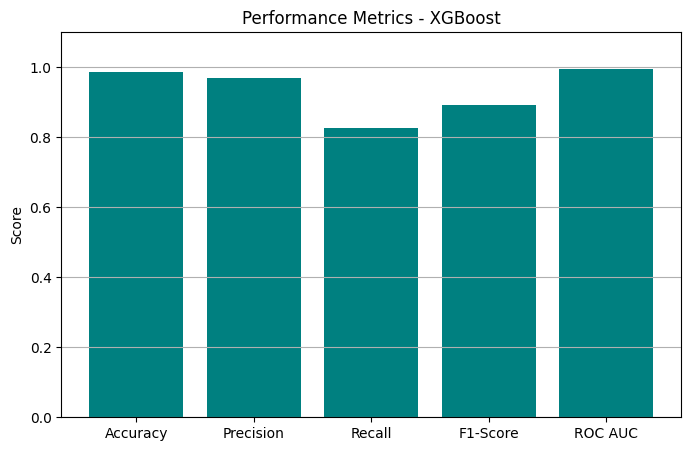

In [96]:
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC AUC": roc_auc
}

plt.figure(figsize=(8,5))
plt.bar(metrics.keys(), metrics.values(), color='teal')
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.title("Performance Metrics - XGBoost")
plt.grid(axis='y')
plt.show()


#### Analytical Evaluation of Fraud Detection Model Performance on Random Samples

This code ensures that `X_test` and `y_test` are in DataFrame and Series formats with appropriate feature names. It then randomly selects 5 non-fraud and 5 fraud samples from the test set, verifying enough samples exist. For these samples, predictions and predicted fraud probabilities are generated using the trained model. The results are stored in a DataFrame, including true labels, predicted labels, and probabilities. A helper function categorizes each prediction as true positive, true negative, false positive, or false negative. Finally, it prints detailed info for each selected sample and summarizes the count of each prediction category.


In [98]:
if not isinstance(X_test, pd.DataFrame):
    categorical_columns = [
        'Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction',
        'Merchant Group', 'Country of Transaction', 'Shipping Address',
        'Country of Residence', 'Gender', 'Bank'
    ]
    numerical_columns = ['Time', 'Age', 'Amount']
    feature_names = categorical_columns + numerical_columns
    X_test = pd.DataFrame(X_test, columns=feature_names)

if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test, index=X_test.index)

np.random.seed(42)  
non_fraud_indices = X_test[y_test == 0].index
fraud_indices = X_test[y_test == 1].index

# Check if enough samples are available
if len(fraud_indices) < 5:
    raise ValueError(f"Not enough fraud cases in test set. Found {len(fraud_indices)}, need 5.")
if len(non_fraud_indices) < 5:
    raise ValueError(f"Not enough non-fraud cases in test set. Found {len(non_fraud_indices)}, need 5.")

non_fraud_sample_indices = np.random.choice(non_fraud_indices, size=5, replace=False)
fraud_sample_indices = np.random.choice(fraud_indices, size=5, replace=False)
selected_indices = np.concatenate([non_fraud_sample_indices, fraud_sample_indices])

X_test_samples = X_test.loc[selected_indices]
y_test_samples = y_test.loc[selected_indices]

y_pred_samples = best_pipeline.predict(X_test_samples)
y_pred_proba_samples = best_pipeline.predict_proba(X_test_samples)[:, 1]

# Create a DataFrame to store results
results_df = X_test_samples.copy()
results_df['True_Label'] = y_test_samples
results_df['Predicted_Label'] = y_pred_samples
results_df['Predicted_Probability_Fraud'] = y_pred_proba_samples

# Function to determine prediction category
def get_prediction_category(true_label, predicted_label):
    if true_label == 1 and predicted_label == 1:
        return "True Positive (Correctly Predicted Fraud)"
    elif true_label == 0 and predicted_label == 0:
        return "True Negative (Correctly Predicted No Fraud)"
    elif true_label == 0 and predicted_label == 1:
        return "False Positive (Incorrectly Predicted as Fraud)"
    elif true_label == 1 and predicted_label == 0:
        return "False Negative (Missed Fraud)"
    return "Unknown"

print("\nRandom Test Samples (5 Non-Fraud + 5 Fraud):")
for idx in selected_indices:
    print(f"\nSample {idx}:")
    sample = results_df.loc[idx]
    for col in X_test.columns:
        print(f"{col}: {sample[col]}")
    print(f"True Label: {sample['True_Label']}")
    print(f"Predicted Label: {sample['Predicted_Label']}")
    print(f"Predicted Probability of Fraud: {sample['Predicted_Probability_Fraud']:.4f}")
    print(f"Prediction Category: {get_prediction_category(sample['True_Label'], sample['Predicted_Label'])}")
    print("-" * 50)

categories = [get_prediction_category(true, pred) for true, pred in zip(y_test_samples, y_pred_samples)]
categorymatched_counts = pd.Series(categories).value_counts()
print("\nSummary of Prediction Categories for Random Samples:")
for category, count in sorted(category_counts.items()):
    print(f"{category}: {count}")


Random Test Samples (5 Non-Fraud + 5 Fraud):

Sample 44768:
Day of Week: Wednesday
Time: 14
Type of Card: MasterCard
Entry Mode: PIN
Amount: 76.0
Type of Transaction: POS
Merchant Group: Restaurant
Country of Transaction: United Kingdom
Shipping Address: United Kingdom
Country of Residence: United Kingdom
Gender: F
Age: 52.9
Bank: Barclays
True Label: 0
Predicted Label: 0
Predicted Probability of Fraud: 0.0000
Prediction Category: True Negative (Correctly Predicted No Fraud)
--------------------------------------------------

Sample 29606:
Day of Week: Wednesday
Time: 11
Type of Card: MasterCard
Entry Mode: CVC
Amount: 29.0
Type of Transaction: Online
Merchant Group: Subscription
Country of Transaction: United Kingdom
Shipping Address: United Kingdom
Country of Residence: United Kingdom
Gender: M
Age: 41.5
Bank: Barclays
True Label: 0
Predicted Label: 0
Predicted Probability of Fraud: 0.0001
Prediction Category: True Negative (Correctly Predicted No Fraud)
----------------------------

In [100]:
display_cols = ['True_Label', 'Predicted_Label', 'Predicted_Probability_Fraud', 'Prediction_Category']
styled_df = results_df[display_cols].style.background_gradient(subset=['Predicted_Probability_Fraud'], cmap='Reds')
styled_df.set_caption("Prediction Details for 10 Random Samples")
styled_df


This code converts `X_test` to a DataFrame with proper column names if needed, then applies the pipeline’s fitted preprocessor to transform the test data. It retrieves the full list of transformed feature names, combining one-hot encoded categorical features and numerical columns. Using the trained XGBoost model, it calculates SHAP values to interpret feature impact on predictions. Finally, it visualizes these SHAP values in a summary plot to show feature importance without warning messages.


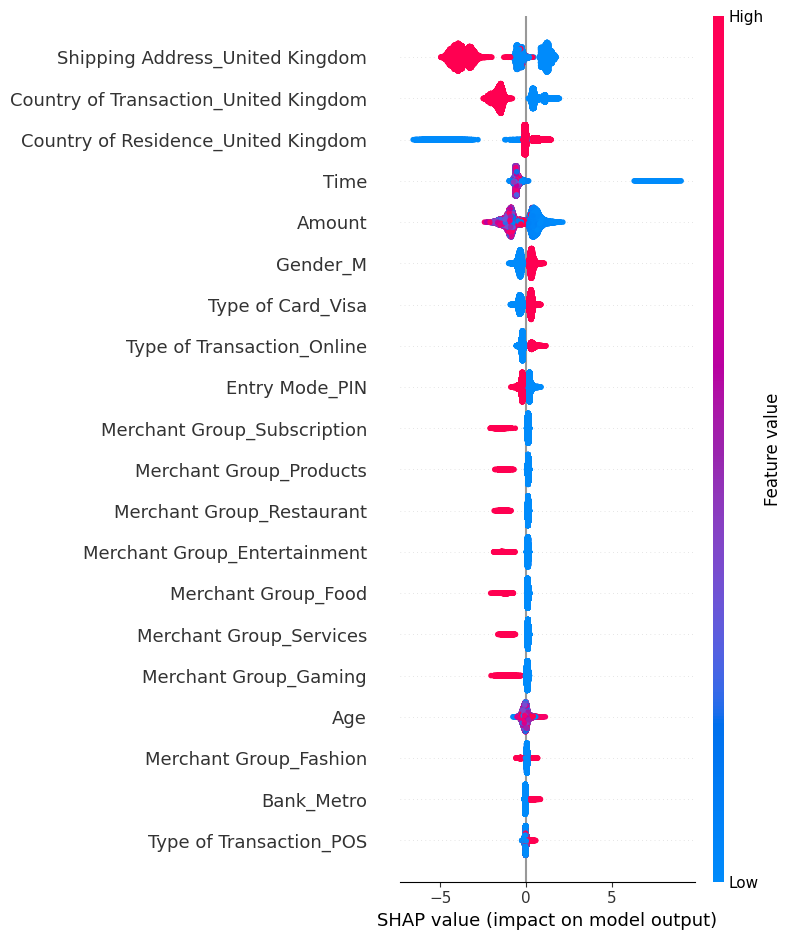

In [104]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# Ensure X_test is a DataFrame with correct column names
if not isinstance(X_test, pd.DataFrame):
    categorical_columns = [
        'Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 
        'Merchant Group', 'Country of Transaction', 'Shipping Address', 
        'Country of Residence', 'Gender', 'Bank'
    ]
    numerical_columns = ['Time', 'Age', 'Amount']
    feature_names = categorical_columns + numerical_columns
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Transform test set with fitted preprocessor
preprocessor = best_pipeline.named_steps['preprocessor']
X_test_transformed = preprocessor.transform(X_test)

# Get transformed feature names
onehot_encoder = preprocessor.named_transformers_['cat']
onehot_feature_names = onehot_encoder.get_feature_names_out(categorical_columns)
numerical_columns = [col for col in X_test.columns if col not in categorical_columns]
transformed_feature_names = np.concatenate([onehot_feature_names, numerical_columns])

# Extract XGBoost model
xgb_model = best_pipeline.named_steps['xgb']

# Compute SHAP values without using global np.random.seed
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_transformed)

# Plot SHAP summary without triggering the warning
plt.figure(figsize=(12, 8))
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=transformed_feature_names,
    show=False  
)
plt.tight_layout()
plt.show()

This comprehensive fraud detection analysis successfully developed an end-to-end system leveraging machine learning and deep learning techniques to identify fraudulent credit card transactions with high efficacy. The project implemented a robust pipeline featuring meticulous data preprocessing (iterative imputation for numerical features, mode imputation for categorical variables, and outlier capping), strategic feature engineering (weighting transaction amounts), and SMOTE oversampling to address severe class imbalance (7.2% fraud rate). Through rigorous evaluation of multiple models—including Logistic Regression, Decision Trees, Random Forest, XGBoost, CNNs, LSTMs, and GRUs—the system achieved optimal performance with XGBoost, which demonstrated exceptional accuracy (98.56%), precision (96.90%), recall (82.56%), F1-score (89.16%), and ROC AUC (99.40%), while innovative probabilistic neural networks with Monte Carlo dropout provided crucial uncertainty quantification.

The system's effectiveness is further validated through SHAP interpretability, detailed visualizations (confusion matrices, ROC curves), and sample-wise analysis showing precise discrimination between legitimate and fraudulent transactions. By combining high predictive accuracy with transparency and robustness, this pipeline delivers actionable insights essential for financial security applications, significantly enhancing fraud detection capabilities while minimizing false positives. The project establishes a reliable framework that not only addresses current fraud detection challenges but also provides a adaptable foundation for future enhancements in financial transaction security.

#### References

1 - Dataset - https://www.kaggle.com/datasets/anurag629/credit-card-fraud-transaction-data/data

2 - https://www.v7labs.com/blog/performance-metrics-in-machine-learning

3 - https://www.analyticsvidhya.com/blog/2021/07/credit-card-fraud-detection-using-gated-recurrent-unit/